In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [3]:
!pip install scikit-plot

In [4]:
import scikitplot as skplt

In [5]:
df = pd.read_csv(r"C:\Users\PC\Downloads\fraudTrain.csv")
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.shape

(1296675, 23)

In [8]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print (percent_missing)

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

count  distribution
genuine  1289169     99.421135
fraud       7506      0.578865

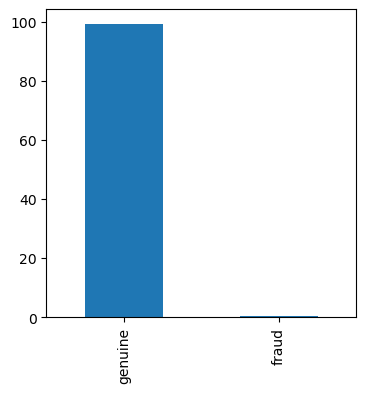

In [13]:
a = df['is_fraud'].value_counts().rename('count') 
b = (df['is_fraud'].value_counts(normalize = True)*100).rename('distribution') 
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [4,4]);
tem

In [14]:
df_ = df['is_fraud'].value_counts()
print(df_)

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [15]:
df['is_fraud'].describe()

count    1.296675e+06
mean     5.788652e-03
std      7.586269e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: is_fraud, dtype: float64

In [16]:
print("Skewness: %f" % df['is_fraud'].skew())
print("Kurtosis: %f" % df['is_fraud'].kurt())

Skewness: 13.029122
Kurtosis: 167.758272


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


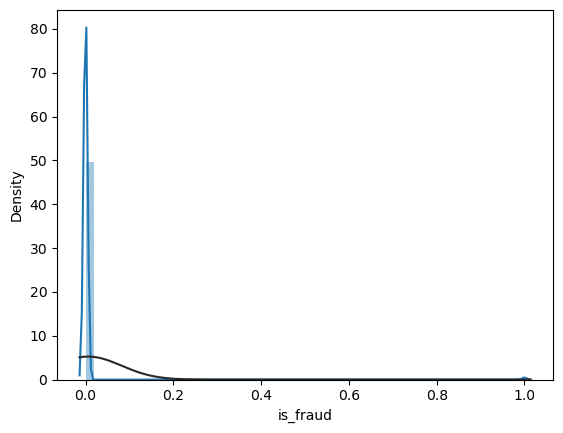

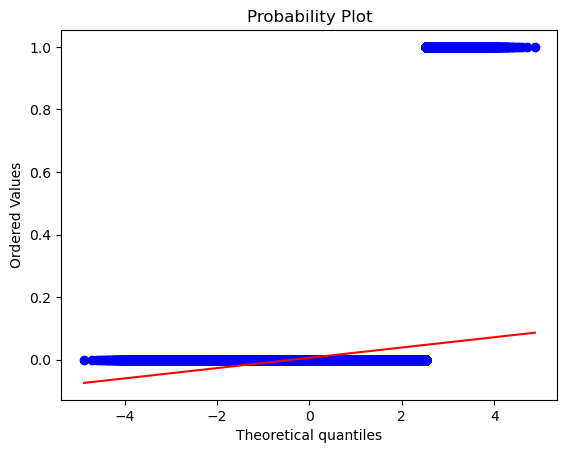

In [17]:
from scipy.stats import norm
sns.distplot(df['is_fraud'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['is_fraud'], plot=plt)

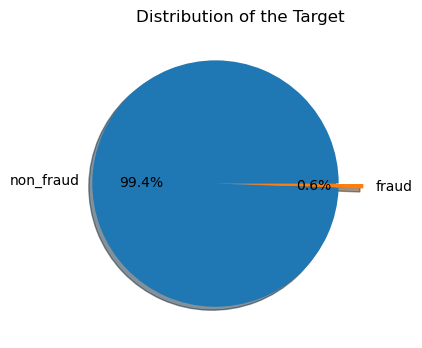

In [18]:
plt.figure(figsize = [4,4])
plot_var = df['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['non_fraud','fraud'], 
        explode = [0.2, 0], 
        shadow = True)
plt.title('Distribution of the Target');

In [19]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time'].head()

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: datetime64[ns]

In [20]:
df['dob'] = pd.to_datetime(df['dob'])
df['dob'].head()

0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]

In [21]:
cat_cols = df.select_dtypes(include = 'object').columns 

for col in cat_cols:
    df[col] = df[col].str.lower().str.strip() 

df[cat_cols].nunique().sort_values()

gender             2
category          14
state             51
first            352
last             481
job              494
merchant         693
city             894
street           983
trans_num    1296675
dtype: int64

In [22]:
cormat = df.corr()
cormat

Unnamed: 0    cc_num       amt       zip       lat      long  \
Unnamed: 0    1.000000  0.000386 -0.000251  0.000709  0.000602 -0.000676   
cc_num        0.000386  1.000000  0.001769  0.041459 -0.059271 -0.048278   
amt          -0.000251  0.001769  1.000000  0.001843 -0.001926 -0.000187   
zip           0.000709  0.041459  0.001843  1.000000 -0.114290 -0.909732   
lat           0.000602 -0.059271 -0.001926 -0.114290  1.000000 -0.015533   
long         -0.000676 -0.048278 -0.000187 -0.909732 -0.015533  1.000000   
city_pop     -0.001678 -0.008991  0.005818  0.078467 -0.155730 -0.052715   
unix_time     0.998971  0.000354 -0.000293  0.000670  0.000632 -0.000642   
merch_lat     0.000541 -0.058942 -0.001873 -0.113561  0.993592 -0.015452   
merch_long   -0.000671 -0.048252 -0.000151 -0.908924 -0.015509  0.999120   
is_fraud     -0.004767 -0.000981  0.219404 -0.002162  0.001894  0.001721   

            city_pop  unix_time  merch_lat  merch_long  is_fraud  
Unnamed: 0 -0.001678   0.998971   0.000541   -0.000671 -0.004767  
cc_num     -0.008991   0.000354  -0.058942   -0.048252 -0.000981  
amt         0.005818  -0.000293  -0.001873   -0.000151  0.219404  
zip         0.078467   0.000670  -0.113561   -0.908924 -0.002162  
lat        -0.155730   0.000632   0.993592   -0.015509  0.001894  
long       -0.052715  -0.000642  -0.015452    0.999120  0.001721  
city_pop    1.000000  -0.001714  -0.154781   -0.052687  0.002136  
unix_time  -0.001714   1.000000   0.000561   -0.000635 -0.005078  
merch_lat  -0.154781   0.000561   1.000000   -0.015431  0.001741  
merch_long -0.052687  -0.000635  -0.015431    1.000000  0.001721  
is_fraud    0.002136  -0.005078   0.001741    0.001721  1.000000

<AxesSubplot:>

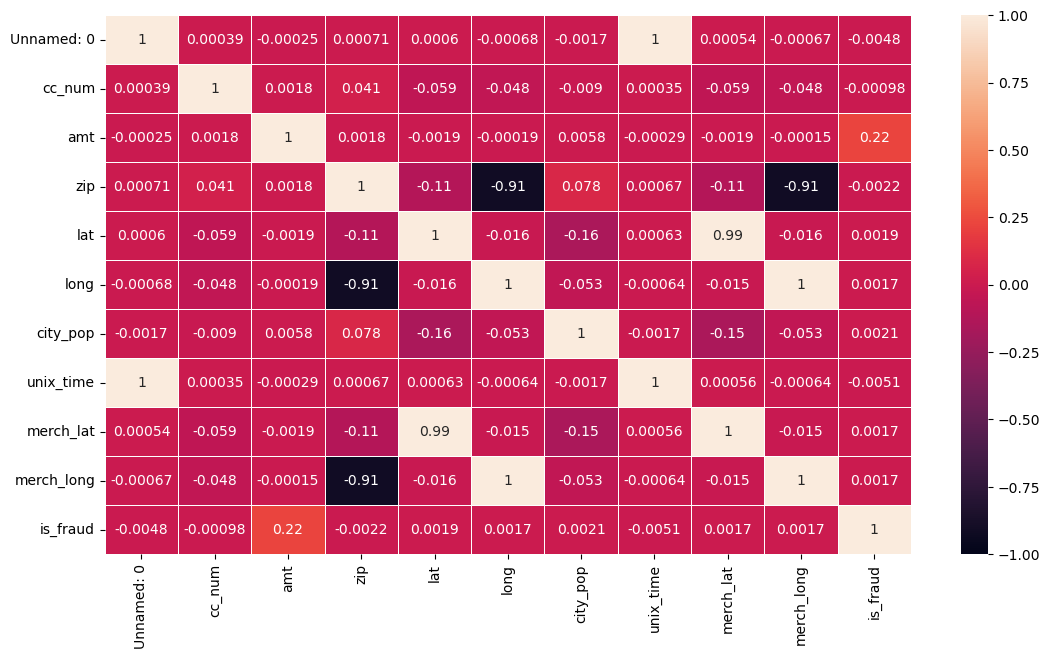

In [23]:
corr = df.corr()
plt.figure(figsize = (13,7))
sns.heatmap(corr, annot=True,linewidth=.5, vmin=-1, vmax=1)

In [24]:
varrr = df.cov()
varrr

Unnamed: 0        cc_num           amt           zip  \
Unnamed: 0  1.401139e+11  1.889907e+20 -1.507265e+04  7.141200e+06   
cc_num      1.889907e+20  1.712974e+36  3.712602e+17  1.459273e+21   
amt        -1.507265e+04  3.712602e+17  2.570123e+04  7.947671e+03   
zip         7.141200e+06  1.459273e+21  7.947671e+03  7.232454e+08   
lat         1.143143e+03 -3.937496e+17 -1.566860e+00 -1.560120e+04   
long       -3.482931e+03 -8.693851e+17 -4.135338e-01 -3.366245e+05   
city_pop   -1.896628e+08 -3.553291e+21  2.816541e+05  6.371980e+08   
unix_time   4.801773e+12  5.943943e+21 -6.031838e+05  2.315423e+08   
merch_lat   1.034302e+03 -3.941887e+17 -1.533955e+00 -1.560545e+04   
merch_long -3.458153e+03 -8.696791e+17 -3.333565e-01 -3.366191e+05   
is_fraud   -1.353809e+02 -9.744831e+13  2.668391e+00 -4.410706e+00   

                     lat          long      city_pop     unix_time  \
Unnamed: 0  1.143143e+03 -3.482931e+03 -1.896628e+08  4.801773e+12   
cc_num     -3.937496e+17 -8.693851e+17 -3.553291e+21  5.943943e+21   
amt        -1.566860e+00 -4.135338e-01  2.816541e+05 -6.031838e+05   
zip        -1.560120e+04 -3.366245e+05  6.371980e+08  2.315423e+08   
lat         2.576383e+01 -1.084830e+00 -2.386825e+05  4.119918e+04   
long       -1.084830e+00  1.893122e+02 -2.190104e+05 -1.133938e+05   
city_pop   -2.386825e+05 -2.190104e+05  9.117764e+10 -6.646054e+09   
unix_time   4.119918e+04 -1.133938e+05 -6.646054e+09  1.648984e+14   
merch_lat   2.577012e+01 -1.086355e+00 -2.388174e+05  3.678089e+04   
merch_long -1.084098e+00  1.893107e+02 -2.190858e+05 -1.123211e+05   
is_fraud    7.292950e-04  1.796185e-03  4.892759e+01 -4.946498e+03   

               merch_lat    merch_long      is_fraud  
Unnamed: 0  1.034302e+03 -3.458153e+03 -1.353809e+02  
cc_num     -3.941887e+17 -8.696791e+17 -9.744831e+13  
amt        -1.533955e+00 -3.333565e-01  2.668391e+00  
zip        -1.560545e+04 -3.366191e+05 -4.410706e+00  
lat         2.577012e+01 -1.084098e+00  7.292950e-04  
long       -1.086355e+00  1.893107e+02  1.796185e-03  
city_pop   -2.388174e+05 -2.190858e+05  4.892759e+01  
unix_time   3.678089e+04 -1.123211e+05 -4.946498e+03  
merch_lat   2.610994e+01 -1.085837e+00  6.747406e-04  
merch_long -1.085837e+00  1.896429e+02  1.798284e-03  
is_fraud    6.747406e-04  1.798284e-03  5.755148e-03

<AxesSubplot:>

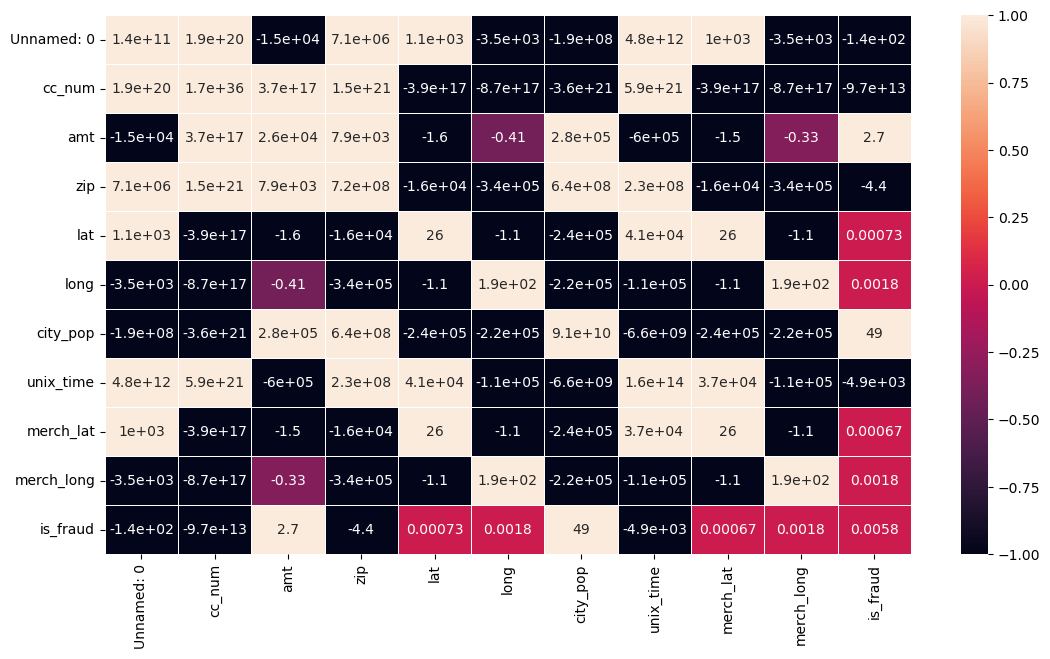

In [25]:
plt.figure(figsize = (13,7))
sns.heatmap(varrr, annot=True,linewidth=.5, vmin=-1, vmax=1)

In [26]:
drop_cols = ['Unnamed: 0','zip','first','last','merchant','trans_num','street','city']
df.drop(drop_cols, axis =1, inplace = True)
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [27]:
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'transaction_hour']

In [28]:
df['transaction_day'] = df['trans_date_trans_time'].dt.day_name()
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'transaction_hour',
 'transaction_day']

In [29]:
df['transaction_month'] = df['trans_date_trans_time'].dt.month
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'transaction_hour',
 'transaction_day',
 'transaction_month']

In [30]:
df['transaction_year'] = df['trans_date_trans_time'].dt.year
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'transaction_hour',
 'transaction_day',
 'transaction_month',
 'transaction_year']

In [31]:
df['age'] = (df['trans_date_trans_time'] - df['dob']).astype('timedelta64[Y]')

df['age'].head()

0    30.0
1    40.0
2    56.0
3    51.0
4    32.0
Name: age, dtype: float64

In [32]:
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'transaction_hour',
 'transaction_day',
 'transaction_month',
 'transaction_year',
 'age']

In [33]:
df.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     983
mean     1319
std       812
min         7
25%       525
50%      1054
75%      2025
max      3123
Name: cc_num, dtype: int32

In [34]:
df.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)
df['unix_time_prev_trans'] = df.groupby(by = ['cc_num'])['unix_time'].shift(1)
df['unix_time_prev_trans'].fillna(df['unix_time'] - 86400, inplace = True)
df['timedelta_last_trans'] = (df['unix_time'] - df['unix_time_prev_trans'])//60

In [35]:
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'transaction_hour',
 'transaction_day',
 'transaction_month',
 'transaction_year',
 'age',
 'unix_time_prev_trans',
 'timedelta_last_trans']

In [36]:
df['lat_dist_cust_merch'] = (df['lat'] -df['merch_lat']).abs()
df['lat_dist_cust_merch'].head(3)

1017    0.969911
2724    0.986034
2726    0.043465
Name: lat_dist_cust_merch, dtype: float64

In [37]:
df['long_dist_cust_merch'] = (df['long'] -df['merch_long']).abs()
df['long_dist_cust_merch'].head(3)

1017    0.845504
2724    0.147772
2726    0.261164
Name: long_dist_cust_merch, dtype: float64

In [38]:
df['prev_merch_lat'] = df.groupby(by = ['cc_num'])['merch_lat'].shift(1) 

df['prev_merch_long'] = df.groupby(by = ['cc_num'])['merch_long'].shift(1)

In [39]:
df['prev_merch_lat'].fillna(df['merch_lat'], inplace = True)

df['prev_merch_long'].fillna(df['merch_long'], inplace = True)

In [40]:
df['lat_dist_prev_merch'] = (df['merch_lat'] - df['prev_merch_lat']).abs() 

df['lat_dist_prev_merch'].head(3)

1017    0.000000
2724    1.955945
2726    0.942569
Name: lat_dist_prev_merch, dtype: float64

In [41]:
df['long_dist_prev_merch'] = (df['merch_long'] -df['prev_merch_long']).abs() 

df['long_dist_prev_merch'].head(3)

1017    0.000000
2724    0.697732
2726    0.113392
Name: long_dist_prev_merch, dtype: float64

In [42]:
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'transaction_hour',
 'transaction_day',
 'transaction_month',
 'transaction_year',
 'age',
 'unix_time_prev_trans',
 'timedelta_last_trans',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'prev_merch_lat',
 'prev_merch_long',
 'lat_dist_prev_merch',
 'long_dist_prev_merch']

In [43]:
df.head()

trans_date_trans_time       cc_num       category    amt gender state  \
1017   2019-01-01 12:47:15  60416207185       misc_net   7.27      f    wy   
2724   2019-01-02 08:44:57  60416207185  gas_transport  52.94      f    wy   
2726   2019-01-02 08:47:36  60416207185  gas_transport  82.08      f    wy   
2882   2019-01-02 12:38:14  60416207185      kids_pets  34.79      f    wy   
2907   2019-01-02 13:10:46  60416207185           home  27.18      f    wy   

          lat      long  city_pop                          job  ...  \
1017  43.0048 -108.8964      1645  information systems manager  ...   
2724  43.0048 -108.8964      1645  information systems manager  ...   
2726  43.0048 -108.8964      1645  information systems manager  ...   
2882  43.0048 -108.8964      1645  information systems manager  ...   
2907  43.0048 -108.8964      1645  information systems manager  ...   

     transaction_year   age  unix_time_prev_trans  timedelta_last_trans  \
1017             2019  32.0          1.325336e+09                1440.0   
2724             2019  32.0          1.325422e+09                1197.0   
2726             2019  32.0          1.325494e+09                   2.0   
2882             2019  32.0          1.325494e+09                 230.0   
2907             2019  32.0          1.325508e+09                  32.0   

      lat_dist_cust_merch  long_dist_cust_merch prev_merch_lat  \
1017             0.969911              0.845504      43.974711   
2724             0.986034              0.147772      43.974711   
2726             0.043465              0.261164      42.018766   
2882             0.776573              0.148717      42.961335   
2907             0.316945              0.805257      42.228227   

      prev_merch_long  lat_dist_prev_merch  long_dist_prev_merch  
1017      -109.741904             0.000000              0.000000  
2724      -109.741904             1.955945              0.697732  
2726      -109.044172             0.942569              0.113392  
2882      -109.157564             0.733108              0.409881  
2907      -108.747683             1.093518              0.656540  

[5 rows x 28 columns]

In [44]:
cat_cols = df.select_dtypes(include = 'object').columns 

for col in cat_cols:
    df[col] = df[col].str.lower().str.strip() 

df[cat_cols].nunique().sort_values()

gender               2
transaction_day      7
category            14
state               51
job                494
dtype: int64

In [45]:
cormat = df.corr()
cormat

cc_num       amt       lat      long  city_pop  \
cc_num                1.000000  0.001769 -0.059271 -0.048278 -0.008991   
amt                   0.001769  1.000000 -0.001926 -0.000187  0.005818   
lat                  -0.059271 -0.001926  1.000000 -0.015533 -0.155730   
long                 -0.048278 -0.000187 -0.015533  1.000000 -0.052715   
city_pop             -0.008991  0.005818 -0.155730 -0.052715  1.000000   
unix_time             0.000354 -0.000293  0.000632 -0.000642 -0.001714   
merch_lat            -0.058942 -0.001873  0.993592 -0.015452 -0.154781   
merch_long           -0.048252 -0.000151 -0.015509  0.999120 -0.052687   
is_fraud             -0.000981  0.219404  0.001894  0.001721  0.002136   
transaction_hour     -0.000801 -0.022811 -0.011508 -0.002290  0.020381   
transaction_month    -0.000281 -0.001748 -0.001072 -0.001213  0.000137   
transaction_year      0.000466  0.000842  0.001274  0.000191 -0.001673   
age                  -0.001224 -0.009756  0.047891 -0.029922 -0.092434   
unix_time_prev_trans  0.000369 -0.000281  0.000602 -0.000648 -0.001722   
timedelta_last_trans -0.004149 -0.003174  0.008056  0.001658  0.002356   
lat_dist_cust_merch   0.000167 -0.000788  0.000163  0.001093 -0.000708   
long_dist_cust_merch -0.001194 -0.000450  0.000466  0.001138  0.000286   
prev_merch_lat       -0.058951 -0.001930  0.993593 -0.015454 -0.154779   
prev_merch_long      -0.048252 -0.000204 -0.015509  0.999120 -0.052688   
lat_dist_prev_merch  -0.000350 -0.001062  0.001019 -0.000486 -0.000983   
long_dist_prev_merch -0.000149 -0.000562 -0.000283 -0.000357 -0.000185   

                      unix_time  merch_lat  merch_long  is_fraud  \
cc_num                 0.000354  -0.058942   -0.048252 -0.000981   
amt                   -0.000293  -0.001873   -0.000151  0.219404   
lat                    0.000632   0.993592   -0.015509  0.001894   
long                  -0.000642  -0.015452    0.999120  0.001721   
city_pop              -0.001714  -0.154781   -0.052687  0.002136   
unix_time              1.000000   0.000561   -0.000635 -0.005078   
merch_lat              0.000561   1.000000   -0.015431  0.001741   
merch_long            -0.000635  -0.015431    1.000000  0.001721   
is_fraud              -0.005078   0.001741    0.001721  1.000000   
transaction_hour       0.000756  -0.011378   -0.002325  0.013799   
transaction_month      0.184868  -0.001116   -0.001197 -0.012409   
transaction_year       0.782582   0.001244    0.000184  0.003004   
age                    0.019768   0.047502   -0.029846  0.012253   
unix_time_prev_trans   0.999993   0.000531   -0.000641 -0.005014   
timedelta_last_trans  -0.033771   0.008070    0.001642 -0.017024   
lat_dist_cust_merch    0.000355   0.000042    0.001119  0.000655   
long_dist_cust_merch  -0.001488   0.000382    0.001179 -0.000201   
prev_merch_lat         0.000558   0.987247   -0.015428  0.001828   
prev_merch_long       -0.000634  -0.015425    0.998243  0.001710   
lat_dist_prev_merch    0.003061   0.000996   -0.000503 -0.001095   
long_dist_prev_merch   0.000590  -0.000182   -0.000362 -0.001257   

                      transaction_hour  ...  transaction_year       age  \
cc_num                       -0.000801  ...          0.000466 -0.001224   
amt                          -0.022811  ...          0.000842 -0.009756   
lat                          -0.011508  ...          0.001274  0.047891   
long                         -0.002290  ...          0.000191 -0.029922   
city_pop                      0.020381  ...         -0.001673 -0.092434   
unix_time                     0.000756  ...          0.782582  0.019768   
merch_lat                    -0.011378  ...          0.001244  0.047502   
merch_long                   -0.002325  ...          0.000184 -0.029846   
is_fraud                      0.013799  ...          0.003004  0.012253   
transaction_hour              1.000000  ...         -0.000811 -0.172972   
transaction_month            -0.000356  ...         -0.464879  0.006652  

In [46]:
drop_cols = ['trans_date_trans_time', 'unix_time','unix_time_prev_trans','dob','lat','long','merch_lat','merch_long','prev_merch_lat','prev_merch_long']
df.drop(drop_cols, axis =1, inplace = True)
df.head()

cc_num       category    amt gender state  city_pop  \
1017  60416207185       misc_net   7.27      f    wy      1645   
2724  60416207185  gas_transport  52.94      f    wy      1645   
2726  60416207185  gas_transport  82.08      f    wy      1645   
2882  60416207185      kids_pets  34.79      f    wy      1645   
2907  60416207185           home  27.18      f    wy      1645   

                              job  is_fraud  transaction_hour transaction_day  \
1017  information systems manager         0                12         tuesday   
2724  information systems manager         0                 8       wednesday   
2726  information systems manager         0                 8       wednesday   
2882  information systems manager         0                12       wednesday   
2907  information systems manager         0                13       wednesday   

      transaction_month  transaction_year   age  timedelta_last_trans  \
1017                  1              2019  32.0                1440.0   
2724                  1              2019  32.0                1197.0   
2726                  1              2019  32.0                   2.0   
2882                  1              2019  32.0                 230.0   
2907                  1              2019  32.0                  32.0   

      lat_dist_cust_merch  long_dist_cust_merch  lat_dist_prev_merch  \
1017             0.969911              0.845504             0.000000   
2724             0.986034              0.147772             1.955945   
2726             0.043465              0.261164             0.942569   
2882             0.776573              0.148717             0.733108   
2907             0.316945              0.805257             1.093518   

      long_dist_prev_merch  
1017              0.000000  
2724              0.697732  
2726              0.113392  
2882              0.409881  
2907              0.656540

In [47]:
list(df.columns)

['cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'city_pop',
 'job',
 'is_fraud',
 'transaction_hour',
 'transaction_day',
 'transaction_month',
 'transaction_year',
 'age',
 'timedelta_last_trans',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'lat_dist_prev_merch',
 'long_dist_prev_merch']

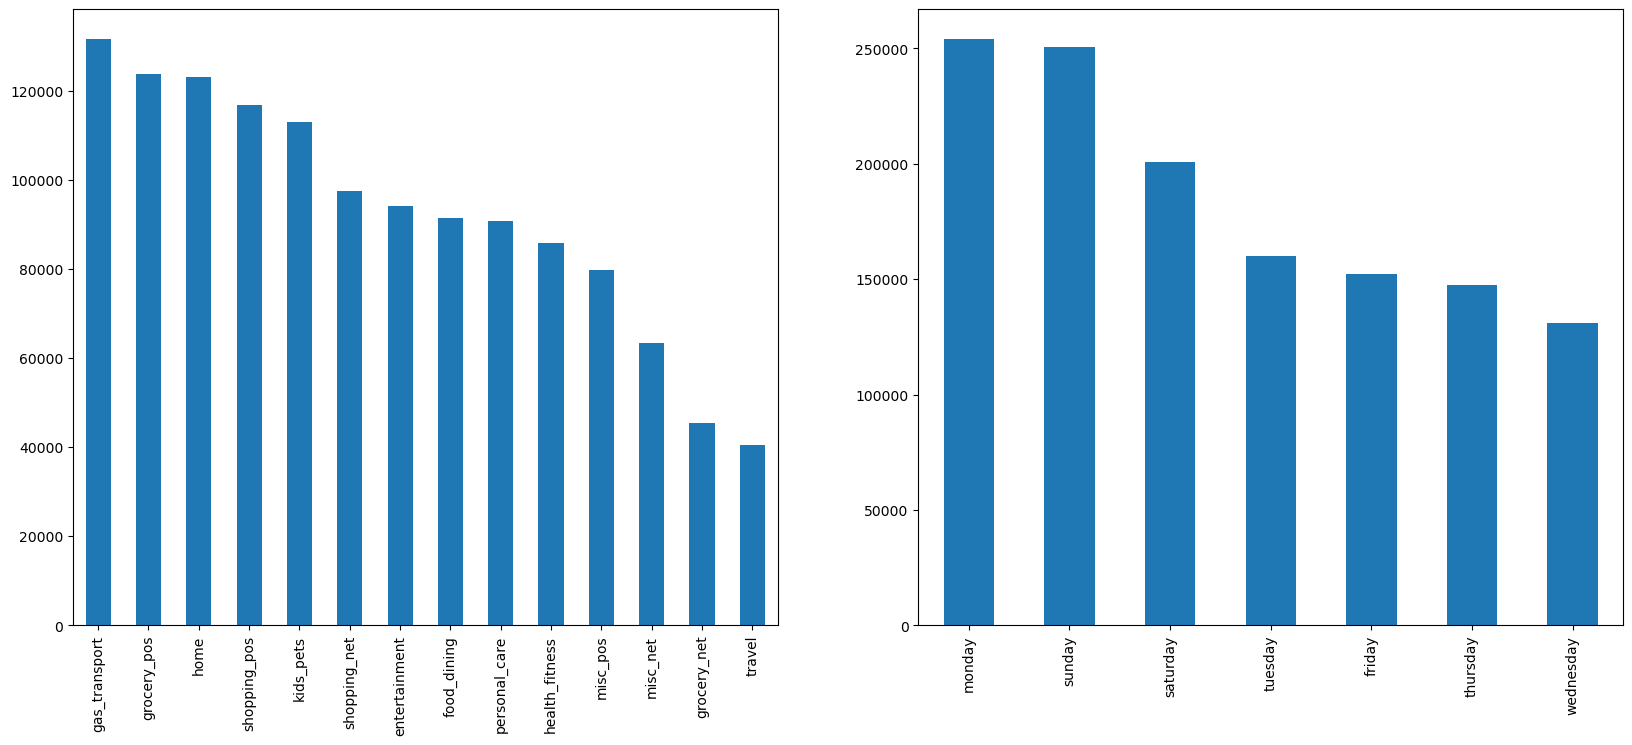

In [48]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['transaction_day'].value_counts().plot.bar();

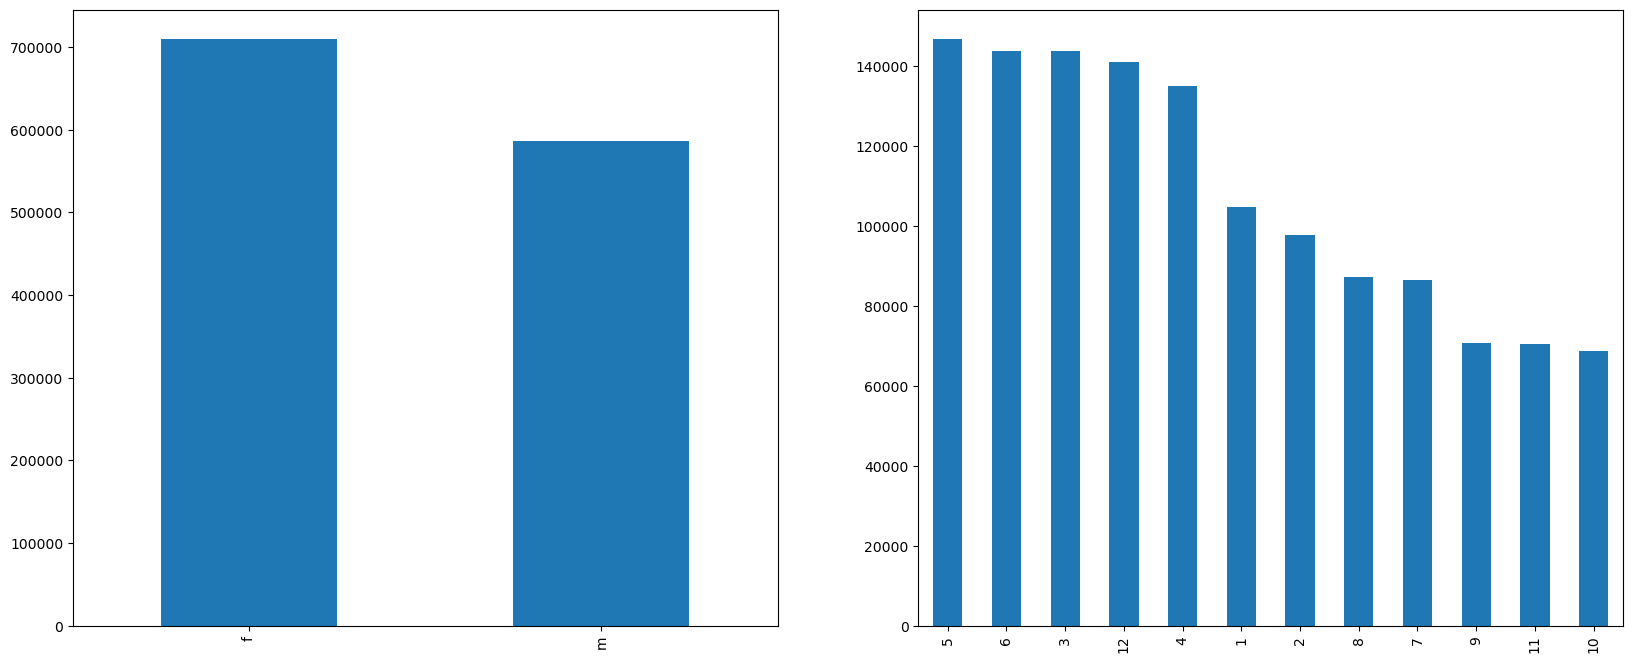

In [49]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['transaction_month'].value_counts().plot.bar();

In [50]:
all = df.copy()
all['class'] = all['is_fraud'].map({1:'Fraud',0:'Non_Fraud'}) 
normal = all[df['is_fraud'] == 0] 
fraud = all[df['is_fraud'] == 1] 

In [51]:
def stats(variable):
    n = (normal[variable].value_counts(normalize = True)*100).round(2).rename('normal')
    f = (fraud[variable].value_counts(normalize = True)*100).round(2).rename('fraud')
    return pd.concat([n,f], axis = 1).transpose()

In [52]:
def stats_by_class(variable):
    stat_grid = all.groupby('class')[variable].agg([np.min,np.max,np.mean,np.median])
    stat_grid = stat_grid.transpose().round(2)
    return stat_grid

class   Fraud  Non_Fraud
amin    14.00      13.00
amax    93.00      95.00
mean    48.29      45.48
median  47.00      43.00

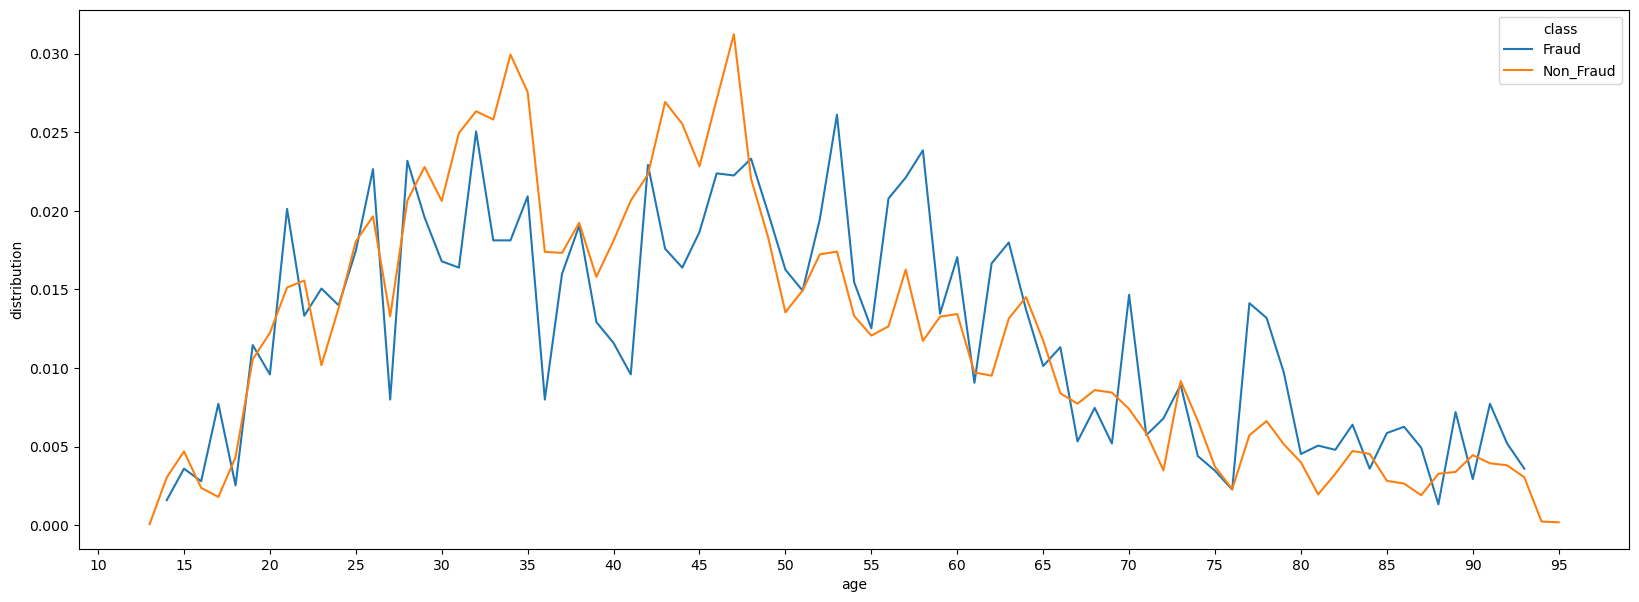

In [53]:
plt.figure(figsize = [20,7])

trans_hour_distribution = all.groupby('class')['age'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'age', y = 'distribution', hue = 'class') 

plt.xticks(np.arange(10,100,5));

stats_by_class('age')

In [54]:
def plot_box (data, x, y, title , width = 6, height = 4):
    plt.figure(figsize = [width,height])
    sns.boxplot(data = data, x = x, y = y)
    plt.title(title)

class     Fraud  Non_Fraud
amin       1.06       1.00
amax    1376.04   28948.90
mean     531.32      67.67
median   396.50      47.28

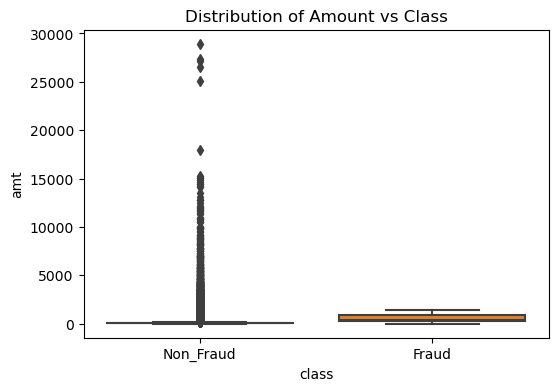

In [55]:
plot_box(all,'class','amt','Distribution of Amount vs Class')

stats_by_class('amt')

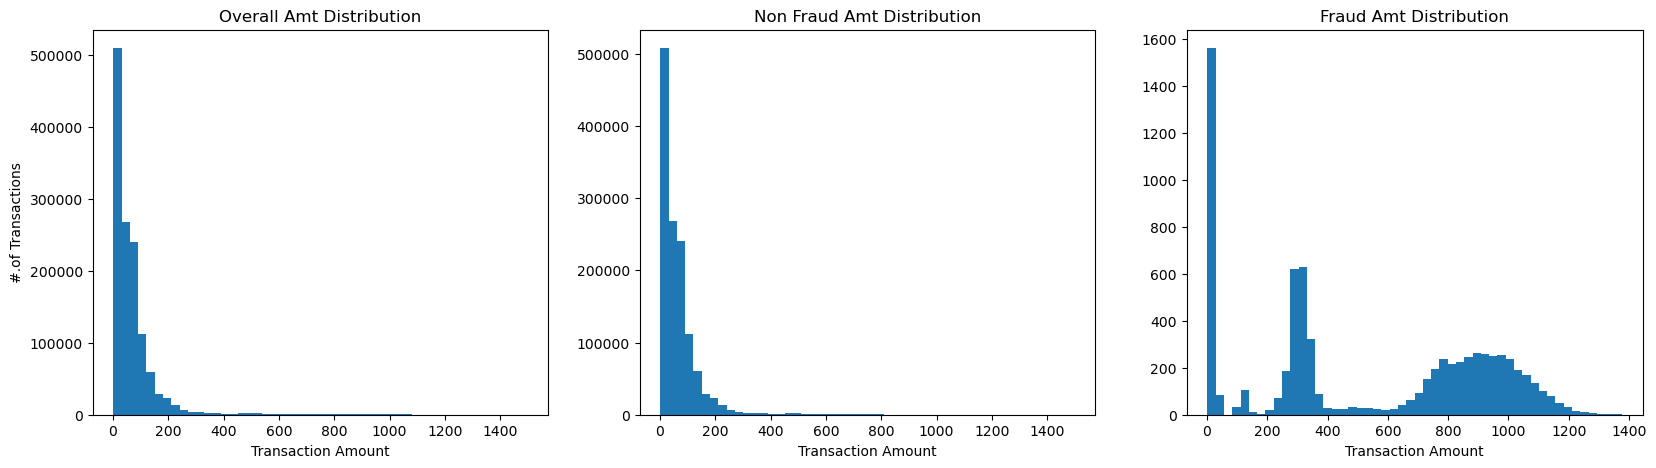

In [56]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df.amt<=1500].amt, bins=50)
ax[1].hist(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50)
ax[2].hist(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

In [57]:
fig = px.treemap(df, path=[px.Constant("USA-states"), 'state', 'category'], values='amt',
                  color='amt', hover_data=['amt'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['amt'], weights=df['amt']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

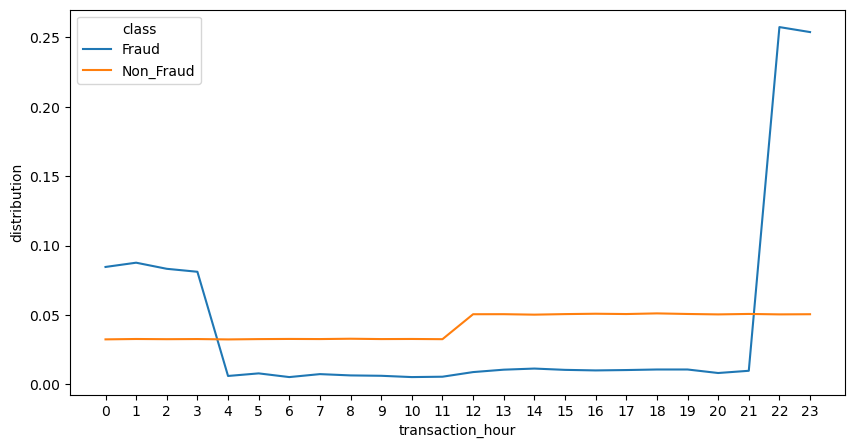

In [58]:
plt.figure(figsize = [10,5])

trans_hour_distribution = all.groupby('class')['transaction_hour'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'transaction_hour', y = 'distribution', hue = 'class')
plt.xticks(np.arange(0,24,1))

plt.show()

class      Fraud  Non_Fraud
amin        0.00       0.00
amax    14417.00   22357.00
mean      365.55     542.63
median     84.00     277.00

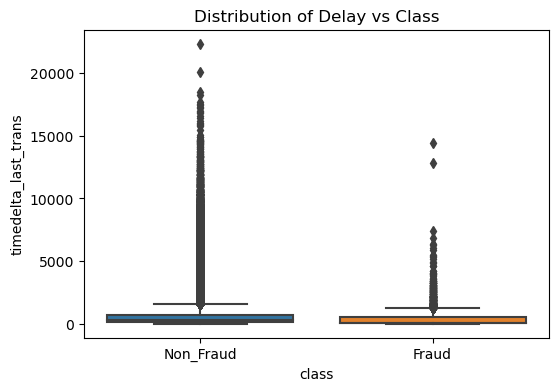

In [59]:
plot_box(all,'class','timedelta_last_trans','Distribution of Delay vs Class')
stats_by_class('timedelta_last_trans')

In [60]:
def normalize_count_by_class(variable, width = 20, height = 7):
    plt.figure(figsize = [width,height])
    normalized_normal = (normal.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized value for normal transactions 
    normalized_fraud = (fraud.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized valued for the fraud transactions
    plot_table = pd.concat([normalized_normal.set_index(variable)[['class','value']],
                             normalized_fraud.set_index(variable)[['class','value']]], axis = 0).reset_index()
    sns.barplot(data = plot_table, x = variable, y = 'value', hue = 'class')
    plt.title('\nNormalized frequency of the varible < '+variable+' > on both classes\n')
    plt.xticks(rotation = 30);
    summary_table = pd.concat([normalized_normal.set_index(variable)['value'],
                             normalized_fraud.set_index(variable)['value']],
                            axis = 1).reset_index() 
    summary_table.columns = [variable, 'normal', 'fraud'] 
    summary_table['diff in %'] = (summary_table['fraud'] - summary_table['normal'])
    summary_table.sort_values(by = 'diff in %', ascending = True, inplace = True)
    del normalized_normal,normalized_fraud,plot_table
    print('\nNormalized frequency of < '+variable+' > on both classes and the percentage diffrence\n')
    return summary_table


Normalized frequency of < transaction_day > on both classes and the percentage diffrence



transaction_day     normal      fraud  diff in %
0          monday  19.632802  15.747402  -3.885400
1          sunday  19.342926  16.200373  -3.142553
3         tuesday  12.356177  12.456701   0.100525
2        saturday  15.492926  16.346922   0.853996
6       wednesday  10.100615  11.444178   1.343563
5        thursday  11.346612  13.429257   2.082645
4          friday  11.727943  14.375167   2.647224

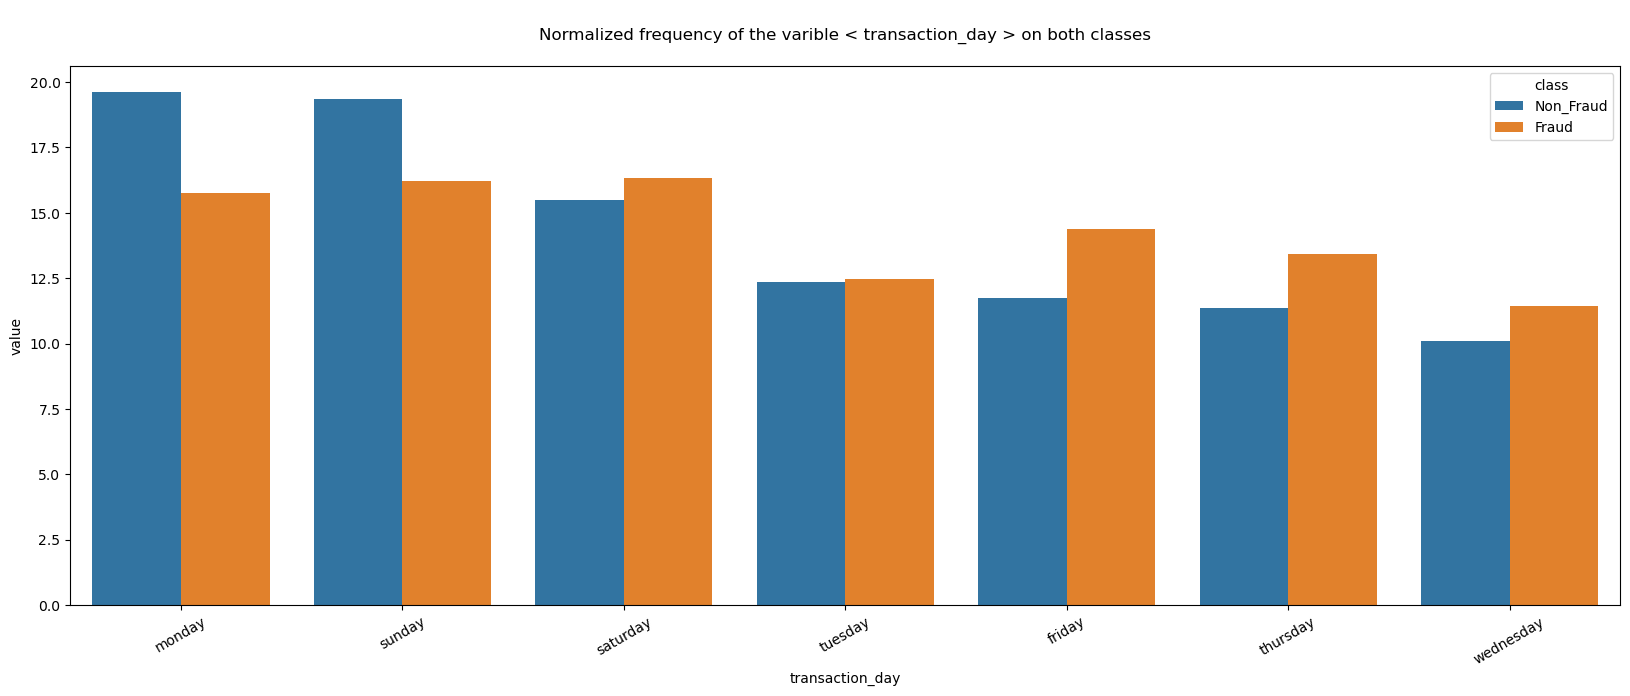

In [61]:
normalize_count_by_class('transaction_day')


Normalized frequency of < state > on both classes and the percentage diffrence



state    normal     fraud  diff in %
0     tx  7.322314  6.381561  -0.940752
38    mt  0.909268  0.426326  -0.482942
9     mo  2.964080  2.544631  -0.419449
27    la  1.619183  1.212363  -0.406819
5     mi  3.561674  3.170797  -0.390878
34    nd  1.142519  0.759392  -0.383126
43    ct  0.596198  0.213163  -0.383035
12    nc  2.336156  1.985079  -0.351077
40    az  0.832552  0.492939  -0.339613
23    nj  1.899286  1.572076  -0.327210
8     al  3.162813  2.864375  -0.298437
45    id  0.429269  0.146549  -0.282719
11    ar  2.402012  2.144951  -0.257062
17    in  2.128348  1.891820  -0.236528
18    ia  2.082194  1.891820  -0.190374
29    wa  1.460476  1.278977  -0.181499
33    nm  1.266320  1.092459  -0.173860
19    ok  2.057760  1.905143  -0.152617
16    ky  2.196764  2.065015  -0.131749
47    hi  0.197957  0.093259  -0.104698
26    ms  1.634619  1.532108  -0.102511
13    wi  2.265413  2.171596  -0.093817
21    ga  2.010365  1.945111  -0.065254
2     pa  6.158153  6.101785  -0.056368
22    wv  1.981509  1.945111  -0.036398
36    ma  0.954646  0.919265  -0.035381
6     il  3.335792  3.304023  -0.031769
28    wy  1.490262  1.465494  -0.024768
41    ut  0.825183  0.812683  -0.012500
3     ca  4.346521  4.343192  -0.003329
46    dc  0.278629  0.279776   0.001147
37    sd  0.950225  0.985878   0.035653
39    vt  0.907251  0.959233   0.051982
20    md  2.019596  2.091660   0.072064
42    nh  0.637542  0.786038   0.148495
49    ri  0.041500  0.199840   0.158341
44    nv  0.431286  0.626166   0.194880
25    ks  1.771684  2.078337   0.306653
10    mn  2.443977  2.757794   0.313816
32    me  1.271051  1.585398   0.314347
48    ak  0.161655  0.479616   0.317962
15    sc  2.249278  2.571276   0.321998
14    va  2.253545  2.637890   0.384345
35    co  1.067897  1.505462   0.437565
7     fl  3.288165  3.743672   0.455507
31    tn  1.350793  1.865175   0.514382
24    ne  1.860734  2.398082   0.537348
30    or  1.430999  1.985079   0.554079
4     oh  3.580524  4.276579   0.696055
1     ny  6.434067  7.394085   0.960018
50    de       NaN  0.119904        NaN

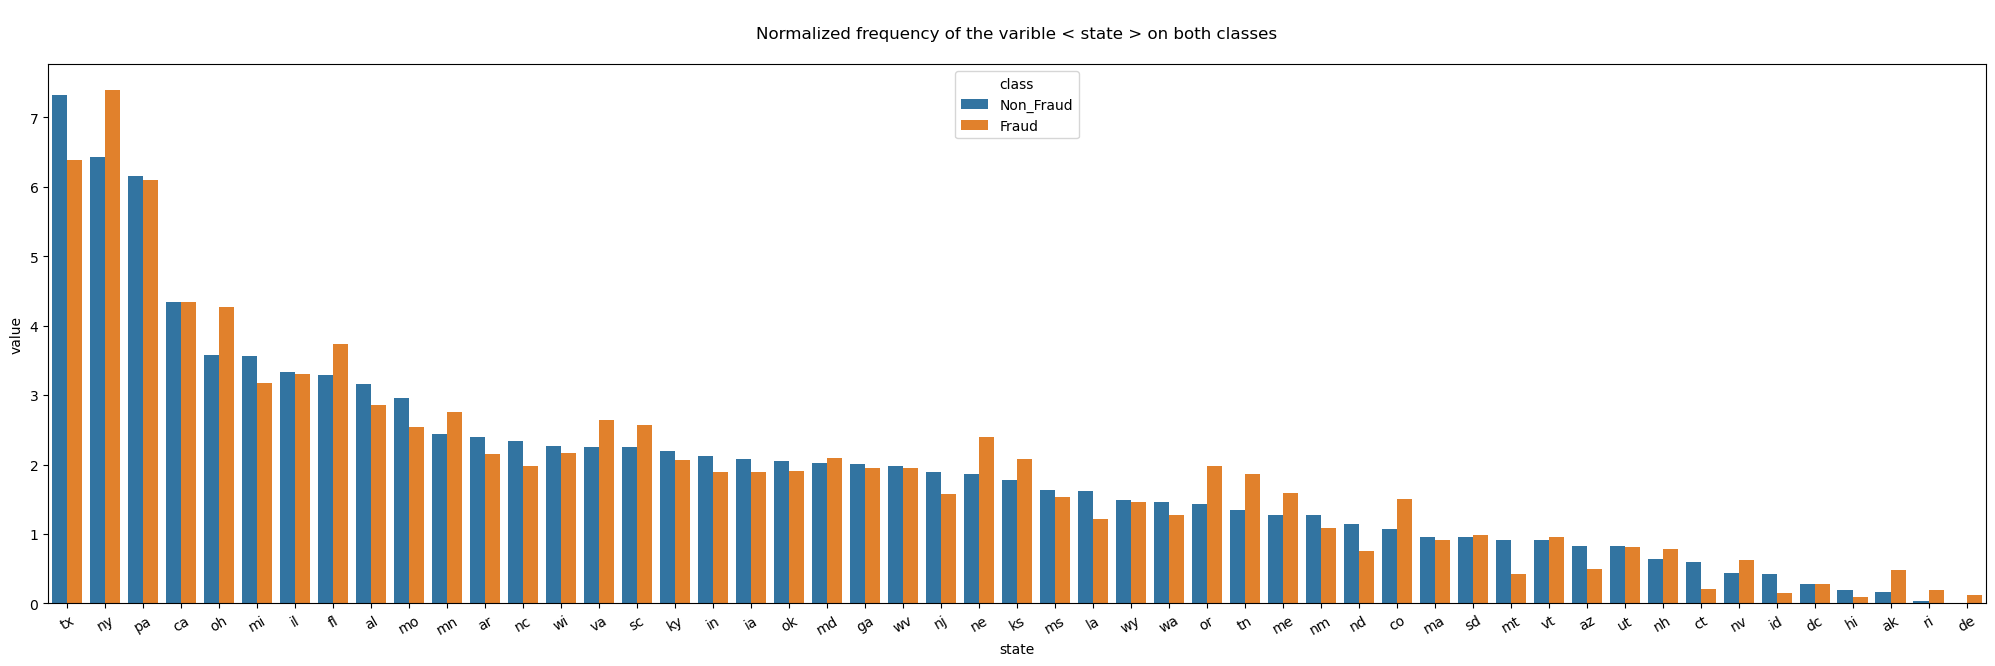

In [62]:
normalize_count_by_class('state', width = 25)

In [63]:
num_cols = df[['amt', 'city_pop', 'transaction_hour', 'transaction_month', 'timedelta_last_trans',
       'age', 'lat_dist_cust_merch', 'long_dist_cust_merch',
       'lat_dist_prev_merch', 'long_dist_prev_merch']]

num_cols

amt  city_pop  transaction_hour  transaction_month  \
1017       7.27      1645                12                  1   
2724      52.94      1645                 8                  1   
2726      82.08      1645                 8                  1   
2882      34.79      1645                12                  1   
2907      27.18      1645                13                  1   
...         ...       ...               ...                ...   
1294934   60.47       532                21                  6   
1295369   74.29       532                 0                  6   
1295587  246.56       532                 2                  6   
1296206    2.62       532                 8                  6   
1296427   39.29       532                 9                  6   

         timedelta_last_trans   age  lat_dist_cust_merch  \
1017                   1440.0  32.0             0.969911   
2724                   1197.0  32.0             0.986034   
2726                      2.0  32.0             0.043465   
2882                    230.0  32.0             0.776573   
2907                     32.0  32.0             0.316945   
...                       ...   ...                  ...   
1294934                 512.0  64.0             0.697605   
1295369                 216.0  64.0             0.429366   
1295587                 126.0  64.0             0.957582   
1296206                 316.0  64.0             0.410139   
1296427                 114.0  64.0             0.473407   

         long_dist_cust_merch  lat_dist_prev_merch  long_dist_prev_merch  
1017                 0.845504             0.000000              0.000000  
2724                 0.147772             1.955945              0.697732  
2726                 0.261164             0.942569              0.113392  
2882                 0.148717             0.733108              0.409881  
2907                 0.805257             1.093518              0.656540  
...                       ...                  ...                   ...  
1294934              0.142595             0.622164              0.242622  
1295369              0.334679             0.268239              0.477274  
1295587              0.536138             0.528216              0.870817  
1296206              0.473733             0.547443              0.062405  
1296427              0.012238             0.063268              0.485971  

[1296675 rows x 10 columns]

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pa

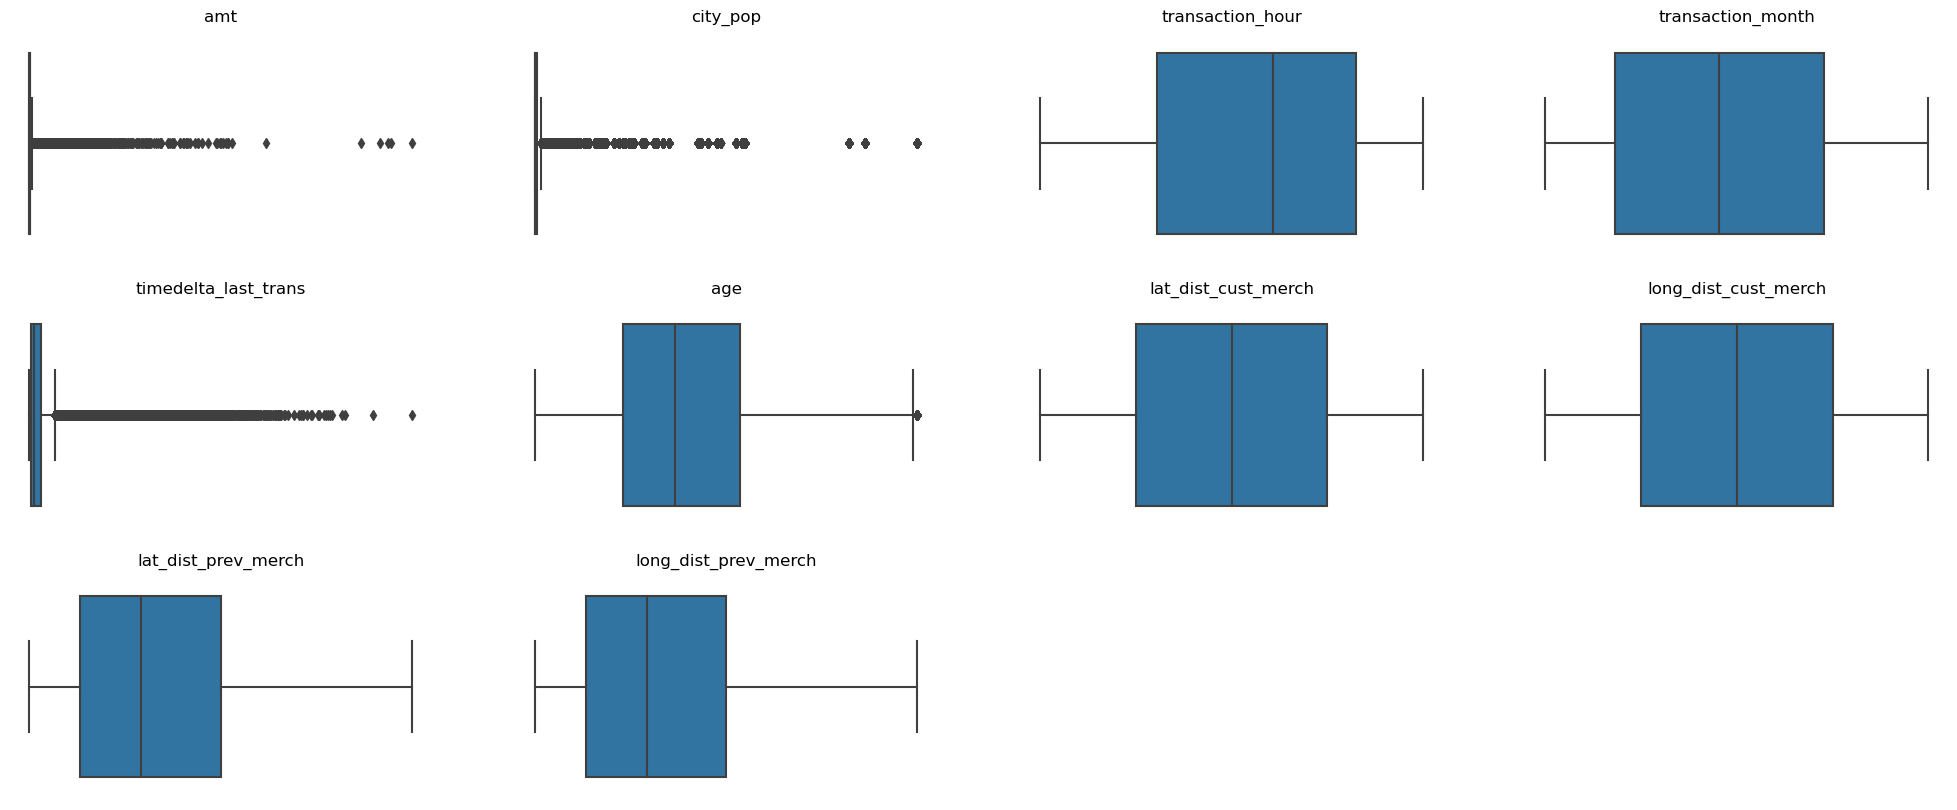

In [64]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
    plot_var = df[col_name]
    plt.subplot(3,4,ind+1)
    sns.boxplot(plot_var)
    plt.title(col_name)
    plt.axis(False)

In [65]:
from feature_engine.outliers import Winsorizer
variables = ['amt', 'city_pop', 'timedelta_last_trans'] # variables to be handled with the outlier

capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = variables) # choosing the IQR method with fold = 1.5 time of IQR
capper_iqr.fit(df)
print('upper capping value : ',capper_iqr.right_tail_caps_) # print the leraned parameters - upper cap

print('lower capping value : ',capper_iqr.left_tail_caps_) # pring the learned parameters 
train_symmetric_X = capper_iqr.transform(df) # transforming symmetric X

df = capper_iqr.transform(df) 

upper capping value :  {'amt': 193.375, 'city_pop': 49705.5, 'timedelta_last_trans': 1530.0}
lower capping value :  {'amt': -100.58499999999998, 'city_pop': -28634.5, 'timedelta_last_trans': -758.0}


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pa

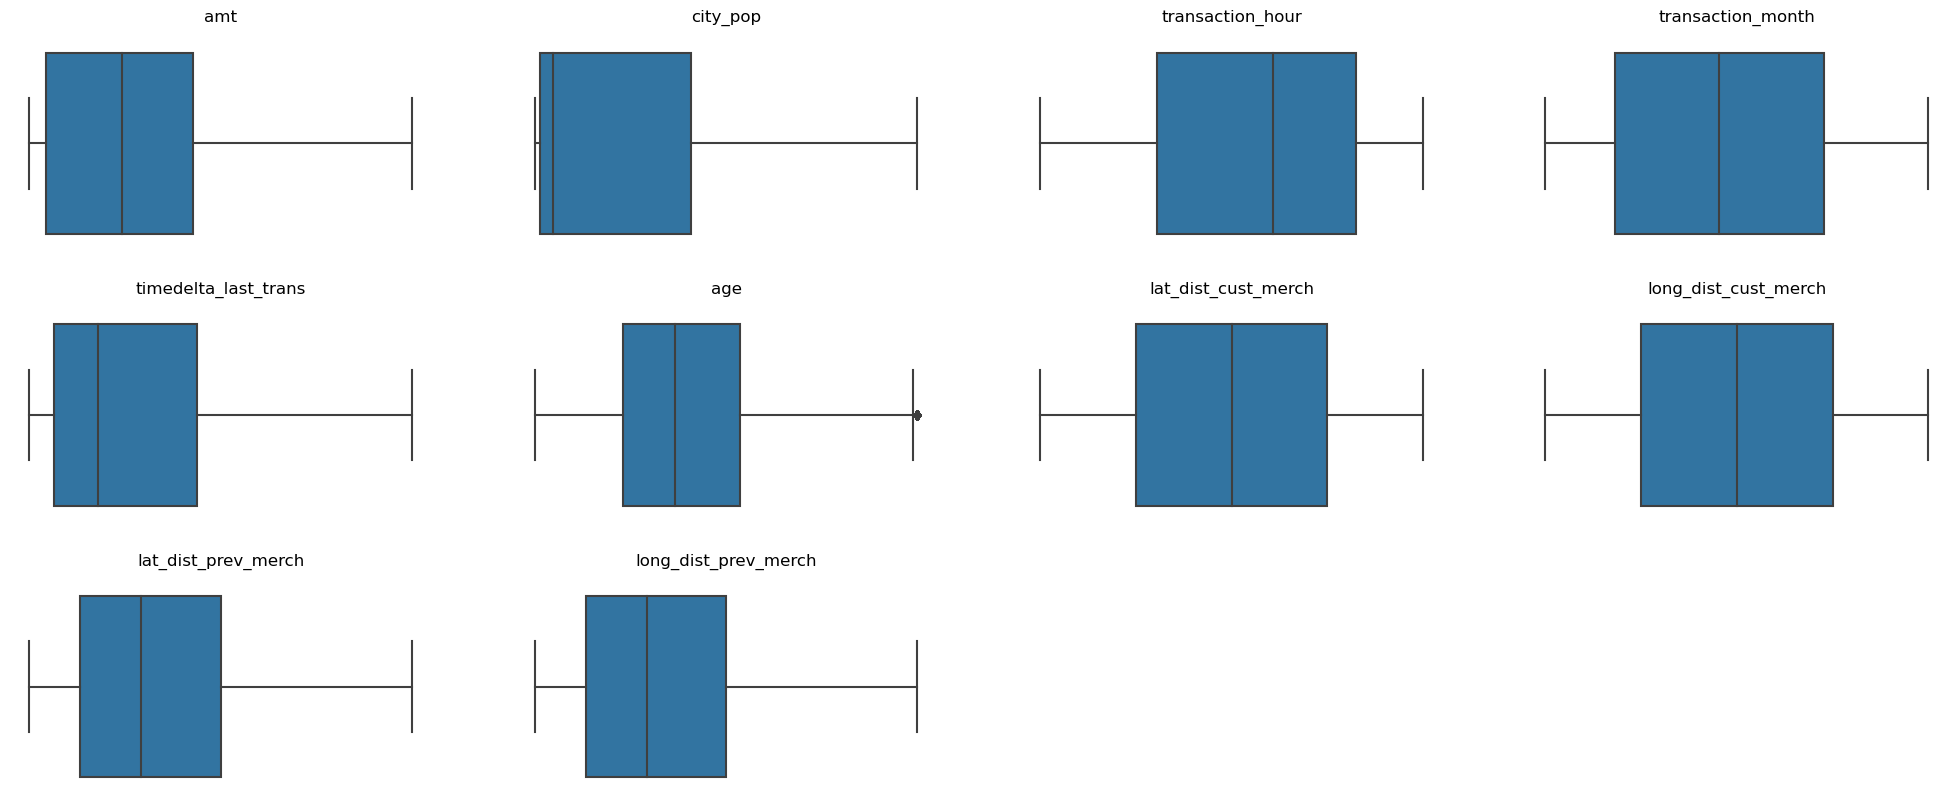

In [66]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
    plot_var = df[col_name]
    plt.subplot(3,4,ind+1)
    sns.boxplot(plot_var)
    plt.title(col_name)
    plt.axis(False)

In [67]:
cat_cols = df.select_dtypes(include = 'object').columns 

for col in cat_cols:
    df[col] = df[col].str.lower().str.strip() 

df[cat_cols].nunique().sort_values()

gender               2
transaction_day      7
category            14
state               51
job                494
dtype: int64

In [68]:
!pip install feature_engine

In [69]:
from feature_engine.encoding import OneHotEncoder

variable = ["category","gender"]
onehot_encod = OneHotEncoder(variables = variable, drop_last = True)
onehot_encod.fit(df)

OneHotEncoder(drop_last=True, variables=['category', 'gender'])

In [70]:
df = onehot_encod.transform(df) 
df.head()

cc_num    amt state  city_pop                          job  \
1017  60416207185   7.27    wy    1645.0  information systems manager   
2724  60416207185  52.94    wy    1645.0  information systems manager   
2726  60416207185  82.08    wy    1645.0  information systems manager   
2882  60416207185  34.79    wy    1645.0  information systems manager   
2907  60416207185  27.18    wy    1645.0  information systems manager   

      is_fraud  transaction_hour transaction_day  transaction_month  \
1017         0                12         tuesday                  1   
2724         0                 8       wednesday                  1   
2726         0                 8       wednesday                  1   
2882         0                12       wednesday                  1   
2907         0                13       wednesday                  1   

      transaction_year  ...  category_shopping_net  category_food_dining  \
1017              2019  ...                      0                     0   
2724              2019  ...                      0                     0   
2726              2019  ...                      0                     0   
2882              2019  ...                      0                     0   
2907              2019  ...                      0                     0   

      category_personal_care  category_grocery_pos  category_entertainment  \
1017                       0                     0                       0   
2724                       0                     0                       0   
2726                       0                     0                       0   
2882                       0                     0                       0   
2907                       0                     0                       0   

      category_shopping_pos  category_misc_pos  category_travel  \
1017                      0                  0                0   
2724                      0                  0                0   
2726                      0                  0                0   
2882                      0                  0                0   
2907                      0                  0                0   

      category_health_fitness  gender_f  
1017                        0         1  
2724                        0         1  
2726                        0         1  
2882                        0         1  
2907                        0         1  

[5 rows x 30 columns]

In [71]:
from feature_engine.encoding import MeanEncoder

variables = ['state','transaction_day','job']
mean_encod = MeanEncoder(variables = variables)
mean_encod.fit(df,y = df["is_fraud"])

MeanEncoder(variables=['state', 'transaction_day', 'job'])

In [72]:
mean_encod.encoder_dict_

{'state': {'ak': 0.016981132075471698,
  'al': 0.005245309717241211,
  'ar': 0.00517235840267292,
  'az': 0.003435468895078923,
  'ca': 0.005784244144783534,
  'co': 0.00814121037463977,
  'ct': 0.002077382498052454,
  'dc': 0.005812344312205923,
  'de': 1.0,
  'fl': 0.006585268683649317,
  'ga': 0.005601810996431723,
  'hi': 0.0027354435326299334,
  'ia': 0.005262182694089309,
  'id': 0.0019837691614066726,
  'il': 0.005733838897623232,
  'in': 0.005148658448150834,
  'ks': 0.006783788484953905,
  'ky': 0.005443371378402107,
  'la': 0.004340567612687813,
  'ma': 0.005575307045895281,
  'md': 0.005993967854006796,
  'me': 0.007209936382914268,
  'mi': 0.005156649477835074,
  'mn': 0.006527085829602069,
  'mo': 0.004973569773194802,
  'ms': 0.005427600528601095,
  'mt': 0.00272247745448358,
  'nc': 0.004923015925460913,
  'nd': 0.0038549979710536995,
  'ne': 0.007447864945382324,
  'nh': 0.00712732544092776,
  'nj': 0.004796163069544364,
  'nm': 0.004997866764186018,
  'nv': 0.008382379

In [73]:
df = mean_encod.transform(df)
df.head()

cc_num    amt     state  city_pop       job  is_fraud  \
1017  60416207185   7.27  0.005693    1645.0  0.008412         0   
2724  60416207185  52.94  0.005693    1645.0  0.008412         0   
2726  60416207185  82.08  0.005693    1645.0  0.008412         0   
2882  60416207185  34.79  0.005693    1645.0  0.008412         0   
2907  60416207185  27.18  0.005693    1645.0  0.008412         0   

      transaction_hour  transaction_day  transaction_month  transaction_year  \
1017                12         0.005835                  1              2019   
2724                 8         0.006554                  1              2019   
2726                 8         0.006554                  1              2019   
2882                12         0.006554                  1              2019   
2907                13         0.006554                  1              2019   

      ...  category_shopping_net  category_food_dining  \
1017  ...                      0                     0   
2724  ...                      0                     0   
2726  ...                      0                     0   
2882  ...                      0                     0   
2907  ...                      0                     0   

      category_personal_care  category_grocery_pos  category_entertainment  \
1017                       0                     0                       0   
2724                       0                     0                       0   
2726                       0                     0                       0   
2882                       0                     0                       0   
2907                       0                     0                       0   

      category_shopping_pos  category_misc_pos  category_travel  \
1017                      0                  0                0   
2724                      0                  0                0   
2726                      0                  0                0   
2882                      0                  0                0   
2907                      0                  0                0   

      category_health_fitness  gender_f  
1017                        0         1  
2724                        0         1  
2726                        0         1  
2882                        0         1  
2907                        0         1  

[5 rows x 30 columns]

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression()

# Create an RFE selector and fit to the data
rfe = RFE(model, n_features_to_select=23)
rfe.fit(df, df['is_fraud'])


# Print the selected features
print("Selected Features: ")
print(df.columns[rfe.support_])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\

Selected Features: 
Index(['state', 'job', 'is_fraud', 'transaction_hour', 'transaction_month',
       'lat_dist_cust_merch', 'long_dist_cust_merch', 'lat_dist_prev_merch',
       'long_dist_prev_merch', 'category_misc_net', 'category_gas_transport',
       'category_kids_pets', 'category_home', 'category_shopping_net',
       'category_food_dining', 'category_personal_care',
       'category_grocery_pos', 'category_entertainment',
       'category_shopping_pos', 'category_misc_pos', 'category_travel',
       'category_health_fitness', 'gender_f'],
      dtype='object')


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [75]:
drop_cols = ['cc_num']
df.drop(drop_cols, axis =1, inplace = True)
df.head()

amt     state  city_pop       job  is_fraud  transaction_hour  \
1017   7.27  0.005693    1645.0  0.008412         0                12   
2724  52.94  0.005693    1645.0  0.008412         0                 8   
2726  82.08  0.005693    1645.0  0.008412         0                 8   
2882  34.79  0.005693    1645.0  0.008412         0                12   
2907  27.18  0.005693    1645.0  0.008412         0                13   

      transaction_day  transaction_month  transaction_year   age  ...  \
1017         0.005835                  1              2019  32.0  ...   
2724         0.006554                  1              2019  32.0  ...   
2726         0.006554                  1              2019  32.0  ...   
2882         0.006554                  1              2019  32.0  ...   
2907         0.006554                  1              2019  32.0  ...   

      category_shopping_net  category_food_dining  category_personal_care  \
1017                      0                     0                       0   
2724                      0                     0                       0   
2726                      0                     0                       0   
2882                      0                     0                       0   
2907                      0                     0                       0   

      category_grocery_pos  category_entertainment  category_shopping_pos  \
1017                     0                       0                      0   
2724                     0                       0                      0   
2726                     0                       0                      0   
2882                     0                       0                      0   
2907                     0                       0                      0   

      category_misc_pos  category_travel  category_health_fitness  gender_f  
1017                  0                0                        0         1  
2724                  0                0                        0         1  
2726                  0                0                        0         1  
2882                  0                0                        0         1  
2907                  0                0                        0         1  

[5 rows x 29 columns]

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df.drop(["is_fraud"], axis =1),df["is_fraud"],test_size=0.30,random_state=42)

In [77]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((907672, 28), (389003, 28), (907672,), (389003,))

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.data_max_
scaler.data_min_

X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns) 

X_valid = pd.DataFrame(data = scaler.transform(X_valid), columns = X_valid.columns)

In [79]:
X_train.head()

amt     state  city_pop       job  transaction_hour  transaction_day  \
0  0.066277  0.003171  0.154360  0.003928          0.739130         0.486986   
1  0.001559  0.002945  0.118352  0.014985          0.086957         0.486986   
2  0.355088  0.005237  0.463382  0.002592          0.391304         0.000000   
3  0.472203  0.003171  0.028179  0.004931          0.869565         0.000000   
4  0.664120  0.004552  0.002274  0.003116          0.956522         0.083843   

   transaction_month  transaction_year       age  timedelta_last_trans  ...  \
0           0.727273               0.0  0.231707              0.036601  ...   
1           0.272727               0.0  0.146341              0.449020  ...   
2           1.000000               0.0  0.585366              0.007190  ...   
3           0.454545               1.0  0.097561              0.015686  ...   
4           0.000000               1.0  0.073171              0.092157  ...   

   category_shopping_net  category_food_dining  category_personal_care  \
0                    0.0                   0.0                     0.0   
1                    0.0                   0.0                     0.0   
2                    0.0                   0.0                     0.0   
3                    0.0                   0.0                     0.0   
4                    0.0                   0.0                     0.0   

   category_grocery_pos  category_entertainment  category_shopping_pos  \
0                   0.0                     1.0                    0.0   
1                   0.0                     0.0                    0.0   
2                   0.0                     0.0                    0.0   
3                   0.0                     0.0                    0.0   
4                   0.0                     0.0                    0.0   

   category_misc_pos  category_travel  category_health_fitness  gender_f  
0                0.0              0.0                      0.0       0.0  
1                0.0              0.0                      0.0       1.0  
2                1.0              0.0                      0.0       0.0  
3                0.0              0.0                      0.0       1.0  
4                0.0              0.0                      0.0       1.0  

[5 rows x 28 columns]

In [80]:
list(X_train.columns)

['amt',
 'state',
 'city_pop',
 'job',
 'transaction_hour',
 'transaction_day',
 'transaction_month',
 'transaction_year',
 'age',
 'timedelta_last_trans',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'lat_dist_prev_merch',
 'long_dist_prev_merch',
 'category_misc_net',
 'category_gas_transport',
 'category_kids_pets',
 'category_home',
 'category_shopping_net',
 'category_food_dining',
 'category_personal_care',
 'category_grocery_pos',
 'category_entertainment',
 'category_shopping_pos',
 'category_misc_pos',
 'category_travel',
 'category_health_fitness',
 'gender_f']

In [81]:
!pip install imbalanced-learn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [82]:
ini_records = sum(y_train == 0)

control_len = ini_records//3 

control_len

300817

In [83]:
resample_pipeline_learning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # oversampling of the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

C:\Users\PC\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



In [84]:
X_resampled, y_resampled = resample_pipeline_learning.fit_resample(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning:

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.



[Pipeline] ............. (step 1 of 2) Processing smote, total=   1.5s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.8s


In [85]:
print(X_resampled.shape, y_resampled.shape,'\n')
print(y_resampled.value_counts(normalize = True)*100)

(601634, 28) (601634,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


In [86]:
from sklearn.neighbors import KNeighborsClassifier
def confusion(X_train, y_train, X_valid, y_valid, model):
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    
    cm = confusion_matrix(y_valid, pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    print(classification_report(y_valid, pred), '\n')
    
    RocCurveDisplay.from_estimator(estimator = model, X = X_valid, y = y_valid)
    
    f_1 = dict([("f1_score_binary", f1_score(y_valid, pred, average="binary")),
                 ("f1_score_micro", f1_score(y_valid, pred, average="micro")),
                ("f1_score_macro", f1_score(y_valid, pred, average="macro")),
                ("f1_score_weighted", f1_score(y_valid, pred, average="weighted"))
                 ])
    mcc = matthews_corrcoef(y_valid, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_valid, pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    
    try:
        auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
        skplt.metrics.plot_cumulative_gain(y_valid, model.predict_proba(X_valid))
    except AttributeError:
        auc = None
        print("predict_proba is not available when probability=False")
    except Exception as e:
        auc = None
        print(e)
    
    plt.show()
    return f_1, mcc, auc

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import discriminant_analysis

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386716
           1       0.96      0.65      0.78      2287

    accuracy                           1.00    389003
   macro avg       0.98      0.83      0.89    389003
weighted avg       1.00      1.00      1.00    389003
 

Sensitivity:  0.6532575426322693
Specificity:  0.9998577767664125


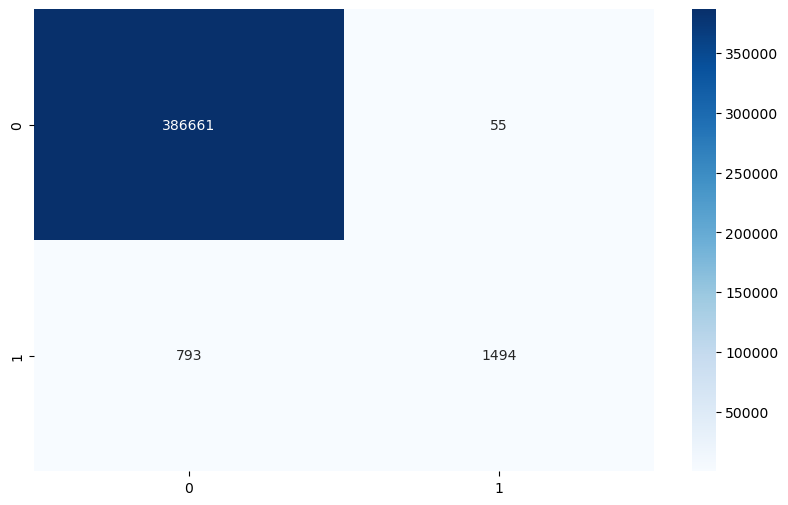

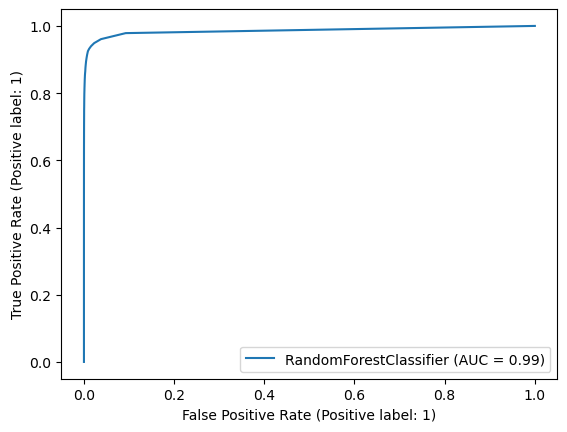

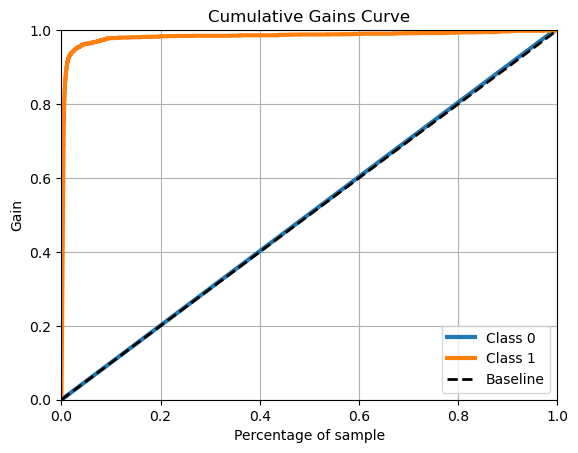

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386716
           1       0.74      0.77      0.75      2287

    accuracy                           1.00    389003
   macro avg       0.87      0.88      0.88    389003
weighted avg       1.00      1.00      1.00    389003
 

Sensitivity:  0.7665063401836467
Specificity:  0.9984381303075125


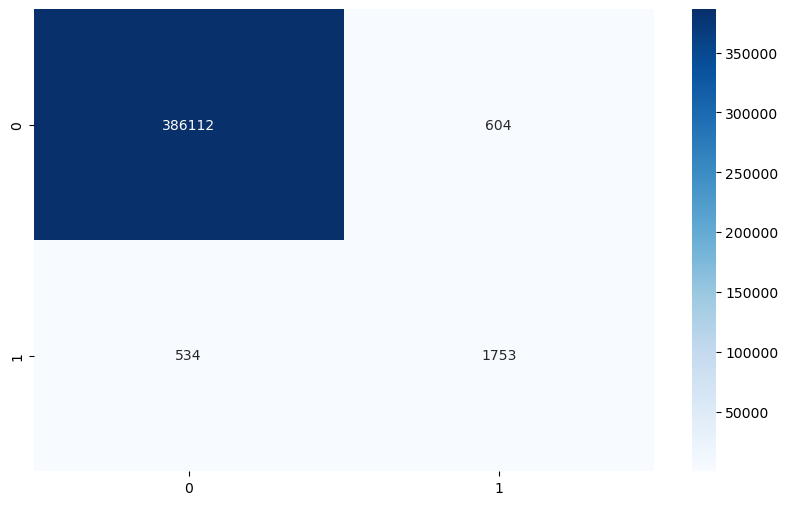

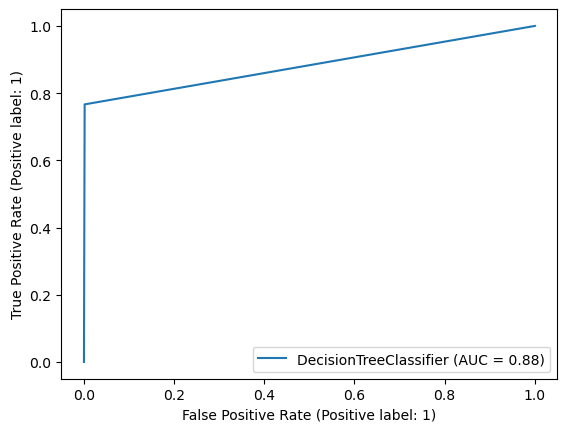

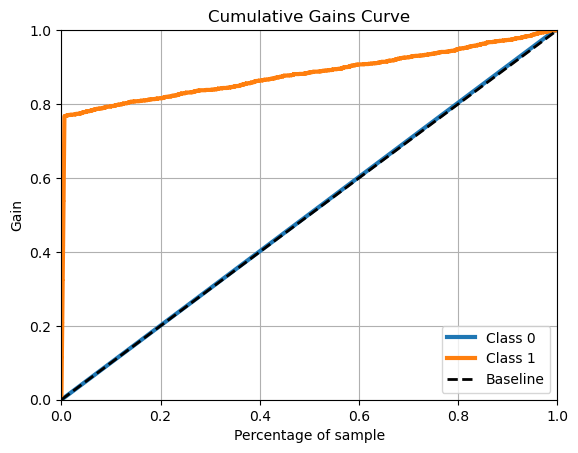

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386716
           1       1.00      0.07      0.13      2287

    accuracy                           0.99    389003
   macro avg       1.00      0.53      0.56    389003
weighted avg       0.99      0.99      0.99    389003
 

Sensitivity:  0.06777437691298645
Specificity:  1.0


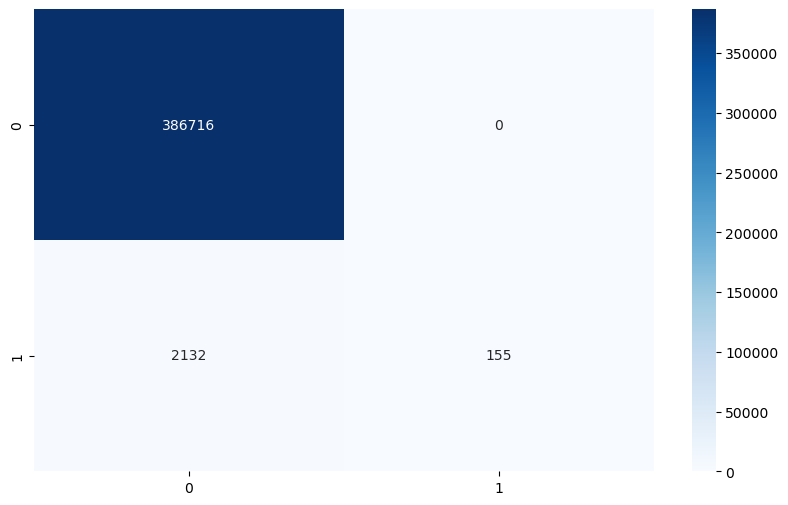

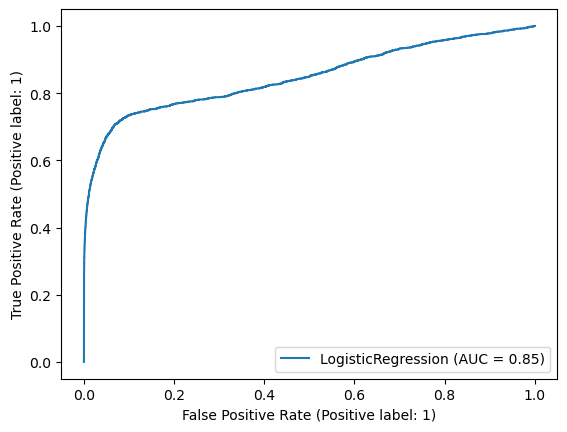

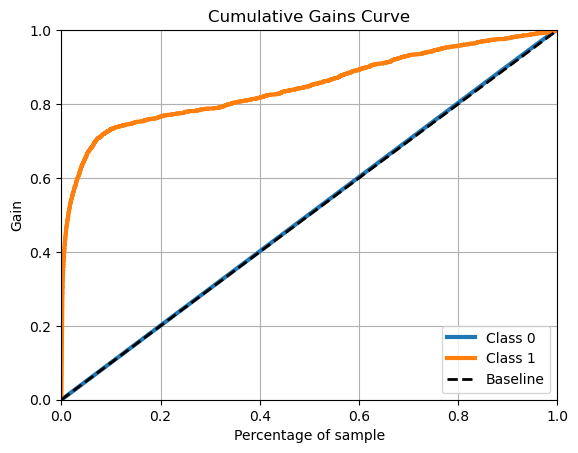

MultinomialNB


C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386716
           1       0.00      0.00      0.00      2287

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003
 

Sensitivity:  0.0
Specificity:  1.0


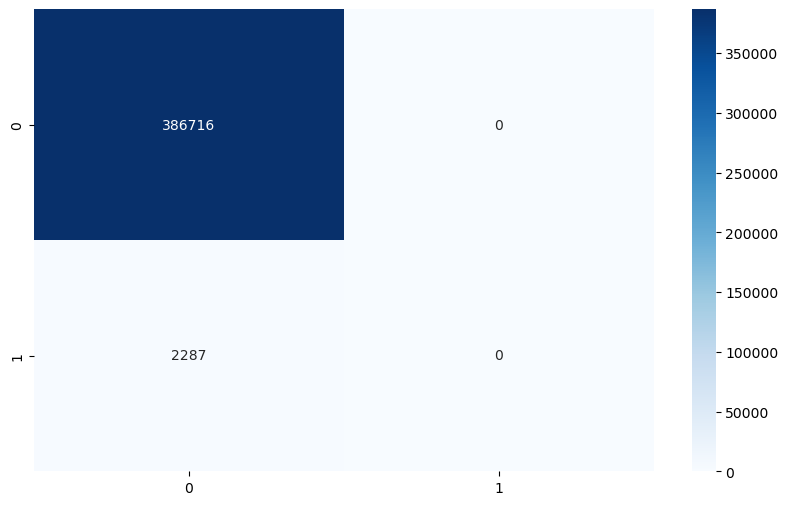

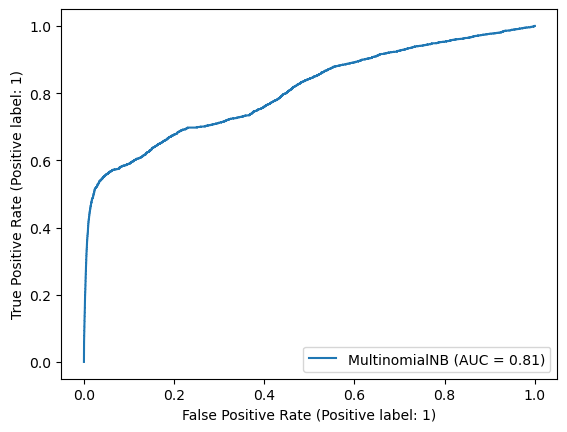

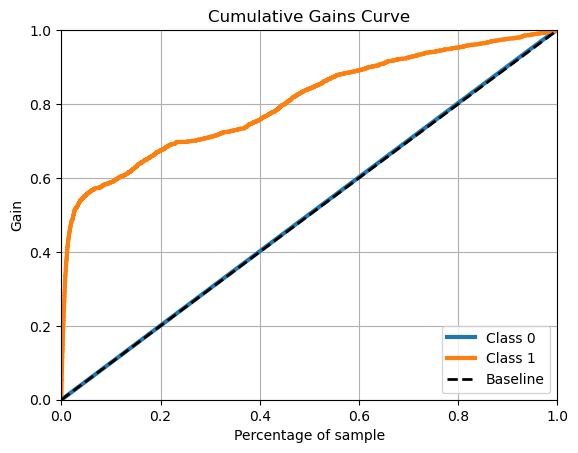

LinearDiscriminantAnalysis
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386716
           1       0.85      0.15      0.26      2287

    accuracy                           0.99    389003
   macro avg       0.92      0.58      0.63    389003
weighted avg       0.99      0.99      0.99    389003
 

Sensitivity:  0.15085264538696982
Specificity:  0.9998422615045667


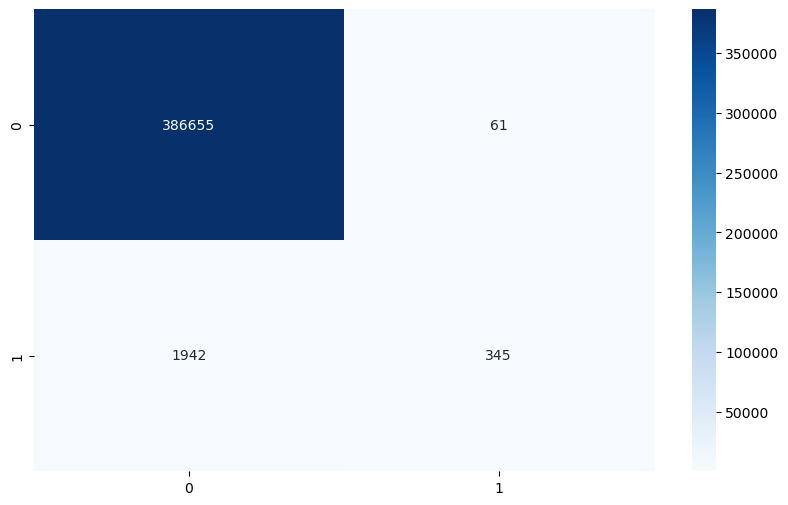

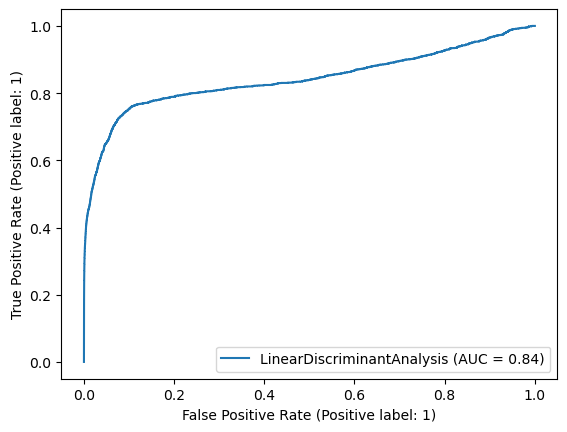

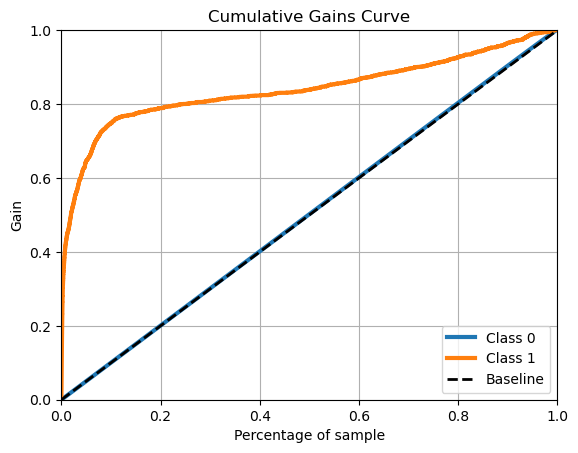

MLPClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386716
           1       0.91      0.65      0.76      2287

    accuracy                           1.00    389003
   macro avg       0.95      0.82      0.88    389003
weighted avg       1.00      1.00      1.00    389003
 

Sensitivity:  0.6462614779186707
Specificity:  0.9996250478387241


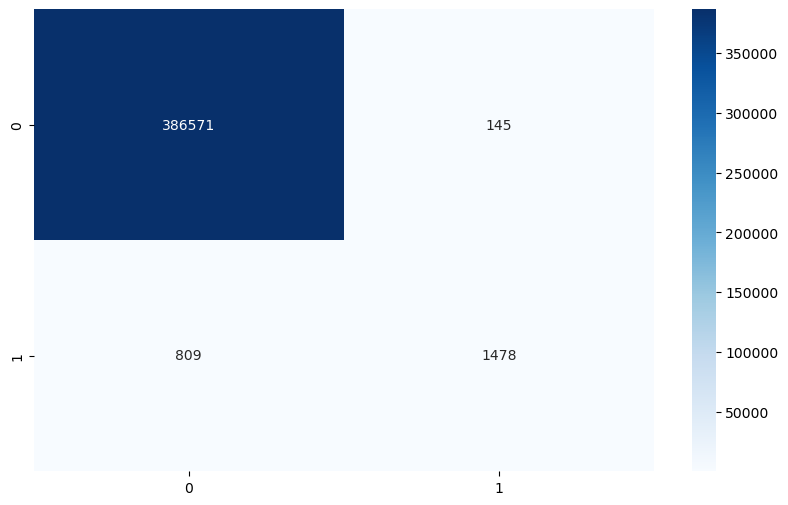

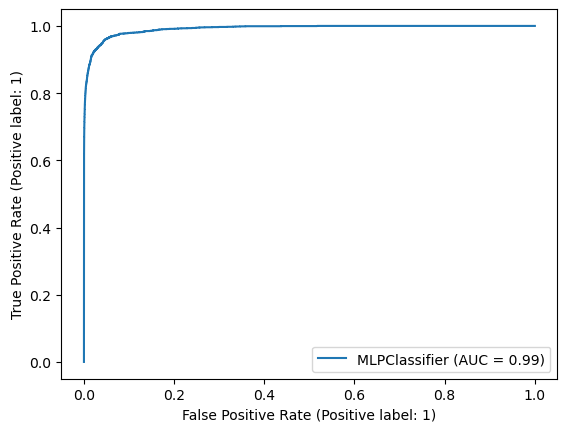

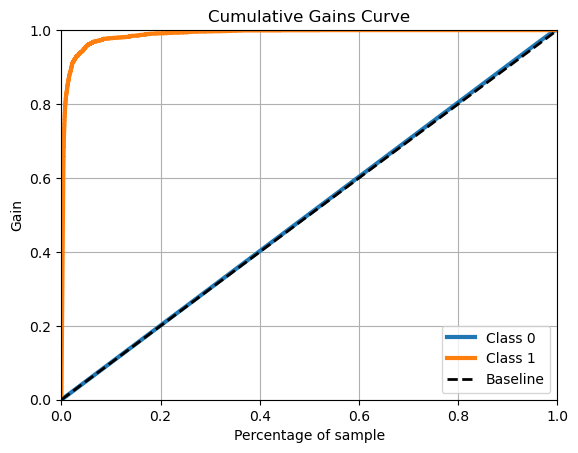

SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386716
           1       0.96      0.41      0.57      2287

    accuracy                           1.00    389003
   macro avg       0.98      0.70      0.79    389003
weighted avg       1.00      1.00      1.00    389003
 

Sensitivity:  0.40752076956711847
Specificity:  0.9998965649210273
predict_proba is not available when probability=False


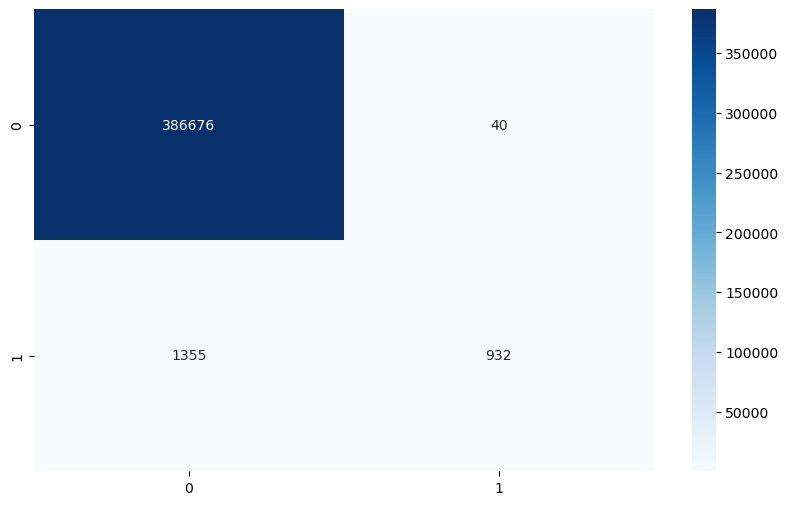

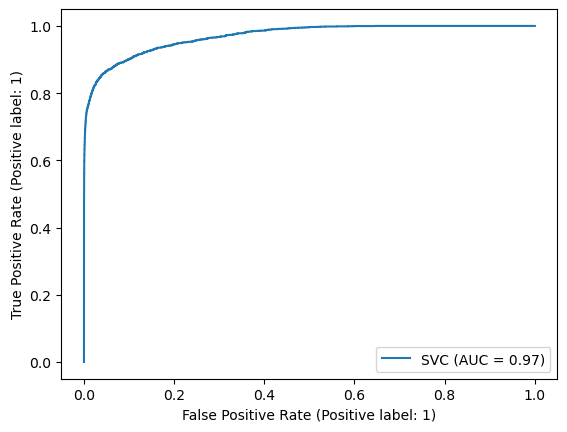

KNeighborsClassifier


KeyboardInterrupt: 

In [95]:
algorithms = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), MultinomialNB(), discriminant_analysis.LinearDiscriminantAnalysis(), MLPClassifier(), SVC(), KNeighborsClassifier()]

algo = []
for algorithm in algorithms:
    print(type(algorithm).__name__)

    f_score, MCC, AUC = confusion(X_train, y_train, X_valid, y_valid,model= algorithm)
    algo.append([type(algorithm).__name__, f_score, MCC, AUC])
print(algo)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
def confusion(X_resampled, y_resampled, X_valid, y_valid, model):
    
    model.fit(X_resampled, y_resampled)
    pred = model.predict(X_valid)
    
    cm = confusion_matrix(y_valid, pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    print(classification_report(y_valid, pred), '\n')
    
    RocCurveDisplay.from_estimator(estimator = model, X = X_valid, y = y_valid)
    
    f_1 = dict([("f1_score_binary", f1_score(y_valid, pred, average="binary")),
                 ("f1_score_micro", f1_score(y_valid, pred, average="micro")),
                ("f1_score_macro", f1_score(y_valid, pred, average="macro")),
                ("f1_score_weighted", f1_score(y_valid, pred, average="weighted"))
                 ])
    mcc = matthews_corrcoef(y_valid, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_valid, pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    
    try:
        auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
        skplt.metrics.plot_cumulative_gain(y_valid, model.predict_proba(X_valid))
    except AttributeError:
        auc = None
        print("predict_proba is not available when probability=False")
    except Exception as e:
        auc = None
        print(e)
        
    plt.show()
    
    return f_1, mcc, auc

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386716
           1       0.63      0.82      0.71      2287

    accuracy                           1.00    389003
   macro avg       0.81      0.91      0.85    389003
weighted avg       1.00      1.00      1.00    389003
 

Sensitivity:  0.8189768255356362
Specificity:  0.9971089895427135


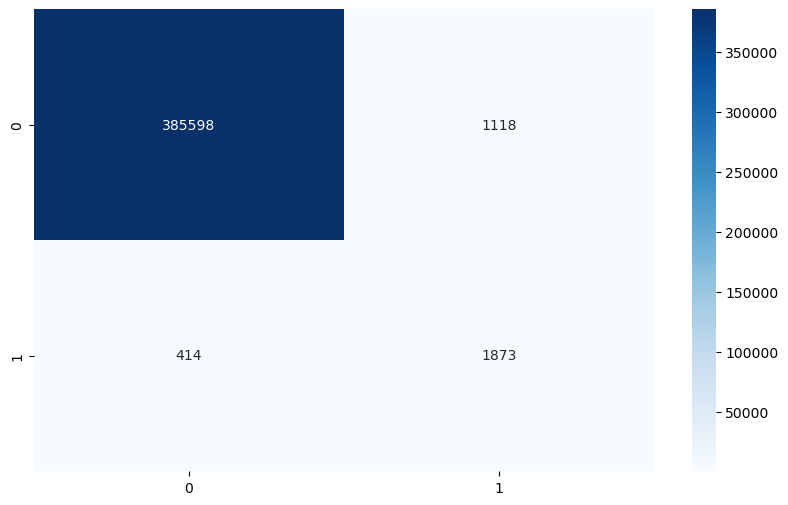

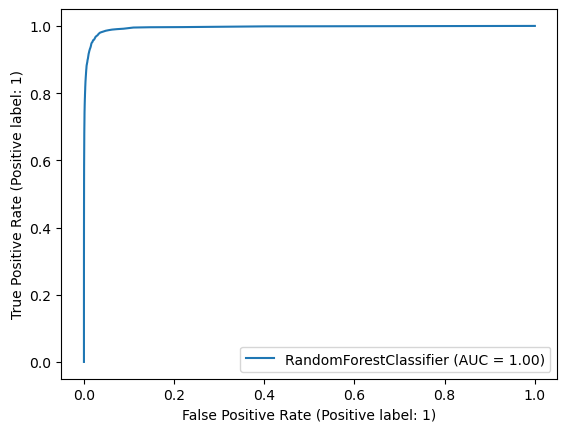

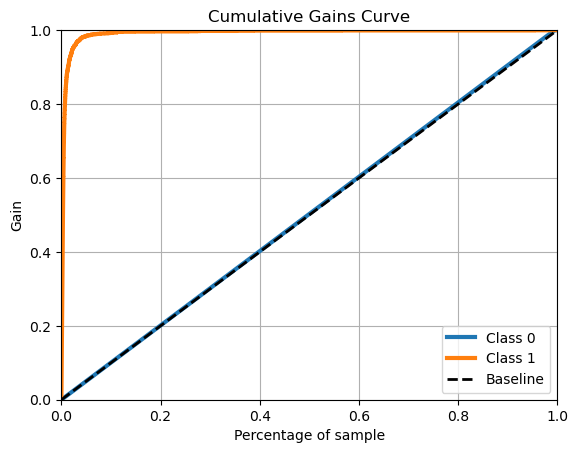

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    386716
           1       0.32      0.78      0.45      2287

    accuracy                           0.99    389003
   macro avg       0.66      0.89      0.72    389003
weighted avg       0.99      0.99      0.99    389003
 

Sensitivity:  0.784871010056843
Specificity:  0.9900159290021618


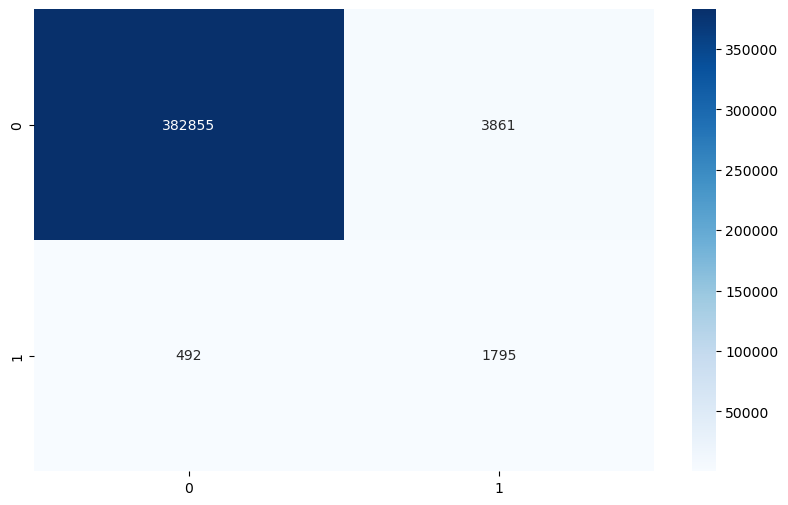

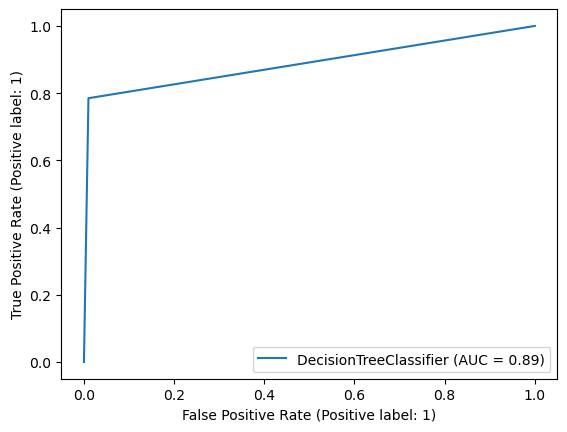

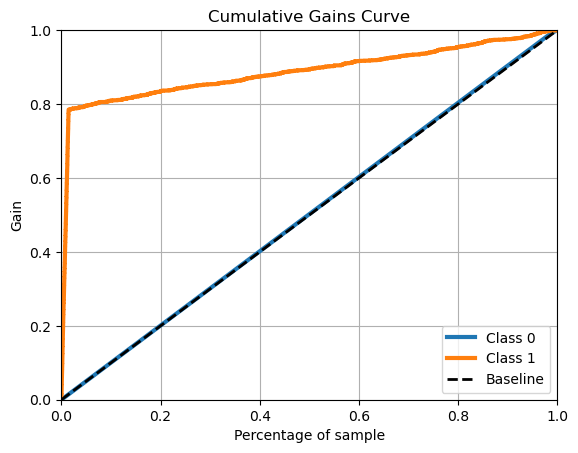

LogisticRegression


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       1.00      0.83      0.91    386716
           1       0.03      0.78      0.05      2287

    accuracy                           0.83    389003
   macro avg       0.51      0.80      0.48    389003
weighted avg       0.99      0.83      0.90    389003
 

Sensitivity:  0.7761259291648448
Specificity:  0.8281529597947848


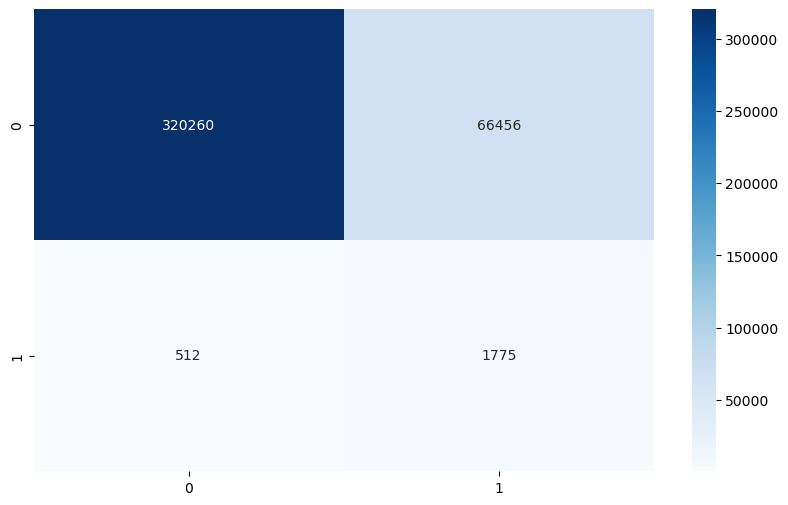

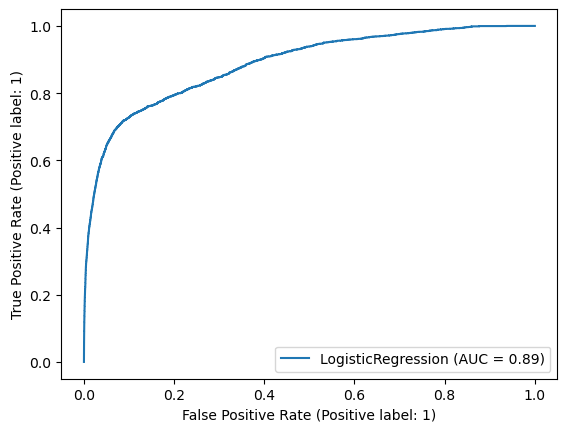

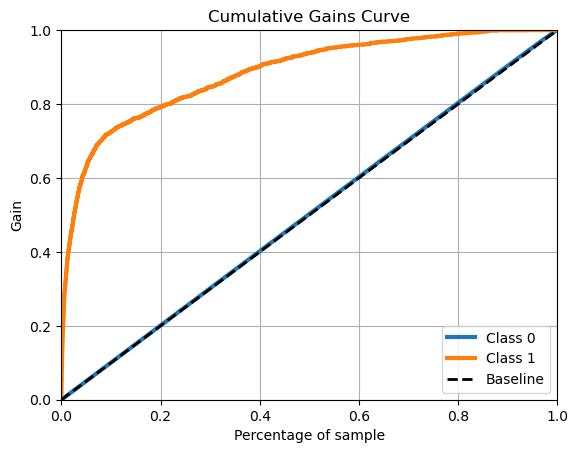

MultinomialNB
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    386716
           1       0.02      0.70      0.03      2287

    accuracy                           0.76    389003
   macro avg       0.51      0.73      0.45    389003
weighted avg       0.99      0.76      0.86    389003
 

Sensitivity:  0.6974202011368605
Specificity:  0.7566819061016353


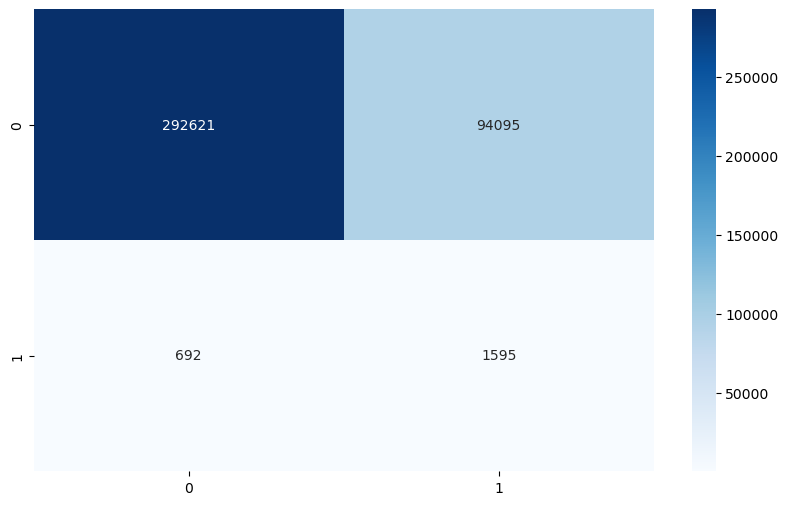

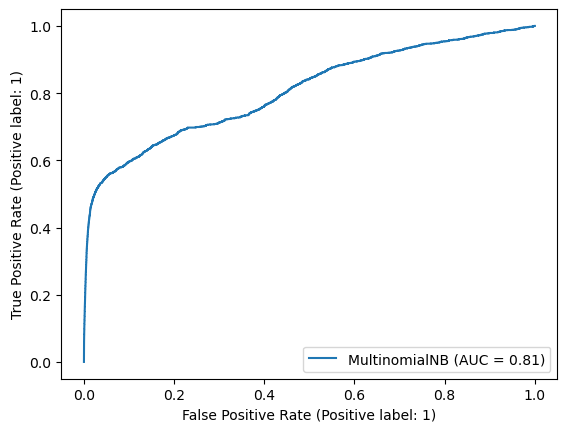

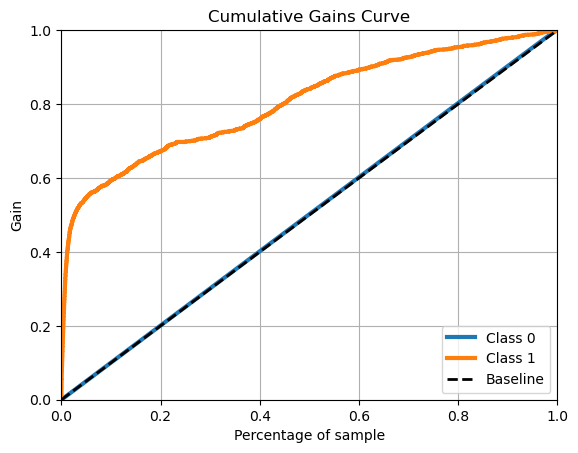

LinearDiscriminantAnalysis
              precision    recall  f1-score   support

           0       1.00      0.81      0.90    386716
           1       0.02      0.77      0.05      2287

    accuracy                           0.81    389003
   macro avg       0.51      0.79      0.47    389003
weighted avg       0.99      0.81      0.89    389003
 

Sensitivity:  0.7656318320944469
Specificity:  0.8144865999855191


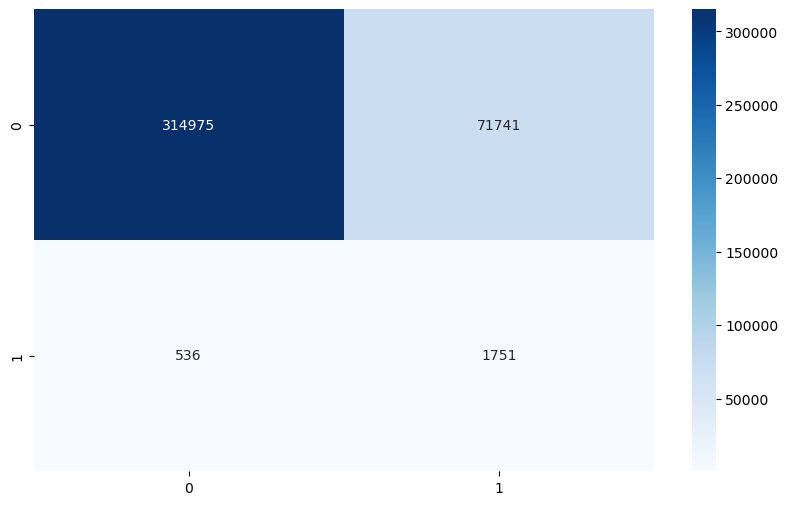

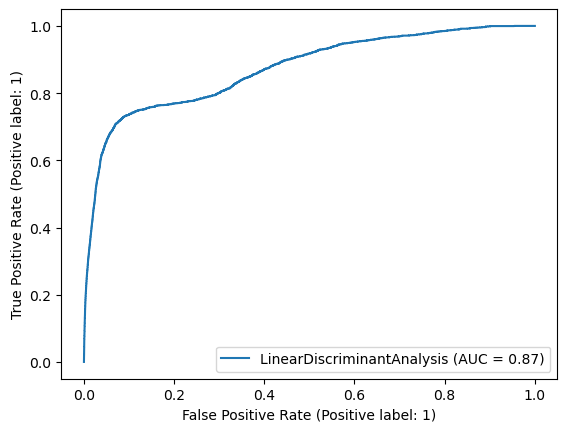

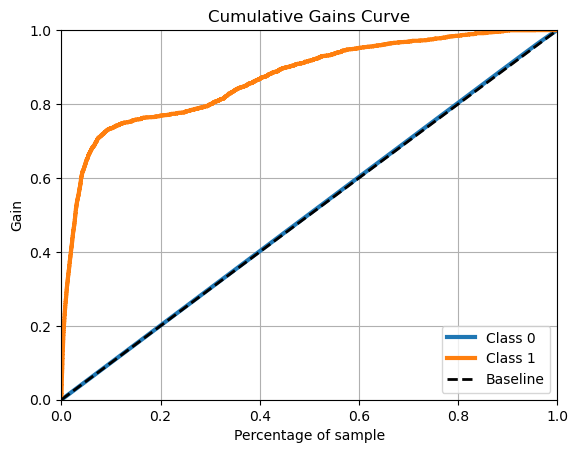

MLPClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    386716
           1       0.29      0.88      0.44      2287

    accuracy                           0.99    389003
   macro avg       0.65      0.93      0.72    389003
weighted avg       1.00      0.99      0.99    389003
 

Sensitivity:  0.879755137735024
Specificity:  0.9874507390436392


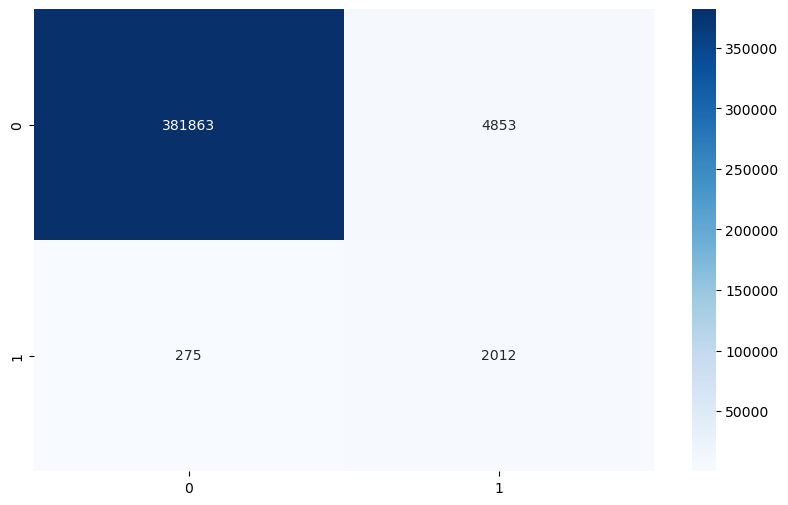

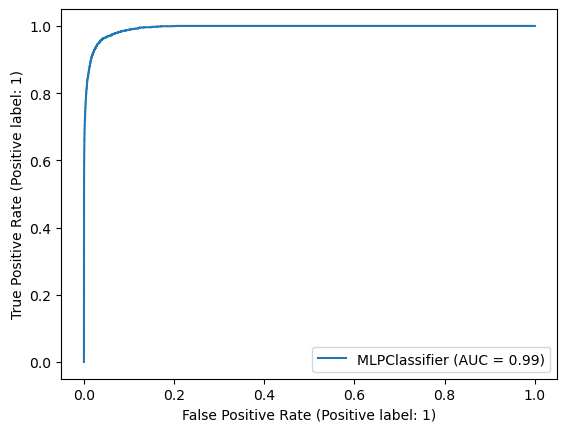

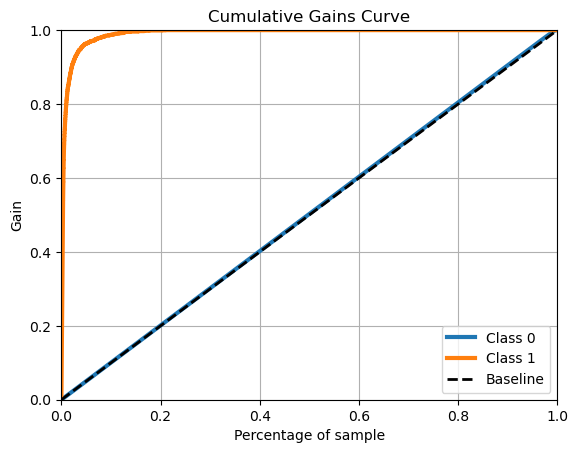

SVC


In [ ]:
algorithms = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), MultinomialNB(), discriminant_analysis.LinearDiscriminantAnalysis(),  MLPClassifier(), SVC(), KNeighborsClassifier()]

algo = []
for algorithm in algorithms:
    print(type(algorithm).__name__)

    f_score, MCC, AUC = confusion(X_resampled, y_resampled, X_valid, y_valid,model= algorithm)
    algo.append([type(algorithm).__name__, f_score, MCC, AUC])
print(algo)

In [89]:
control_len = 100000 

resample_pipeline_tuning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42),
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), 
                                  verbose = 1)

X_tuning, y_tuning = resample_pipeline_tuning.fit_resample(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.

C:\Users\PC\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning:

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.



[Pipeline] ............. (step 1 of 2) Processing smote, total=   1.2s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.4s


In [91]:
print(X_tuning.shape, y_tuning.shape,'\n')
print(y_tuning.value_counts(normalize = True)*100)

(200000, 28) (200000,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


In [92]:
from sklearn.neighbors import KNeighborsClassifier
def confusion(X_tuning, y_tuning, X_valid, y_valid, model):
    
    model.fit(X_tuning, y_tuning)
    pred = model.predict(X_valid)
    
    cm = confusion_matrix(y_valid, pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    print(classification_report(y_valid, pred), '\n')
    
    RocCurveDisplay.from_estimator(estimator = model, X = X_valid, y = y_valid)
    
    f_1 = dict([("f1_score_binary", f1_score(y_valid, pred, average="binary")),
                 ("f1_score_micro", f1_score(y_valid, pred, average="micro")),
                ("f1_score_macro", f1_score(y_valid, pred, average="macro")),
                ("f1_score_weighted", f1_score(y_valid, pred, average="weighted"))
                 ])
    mcc = matthews_corrcoef(y_valid, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_valid, pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    
    try:
        auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
        skplt.metrics.plot_cumulative_gain(y_valid, model.predict_proba(X_valid))
    except AttributeError:
        auc = None
        print("predict_proba is not available when probability=False")
    except Exception as e:
        auc = None
        print(e)
        
    plt.show()
    
    return f_1, mcc, auc

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    386716
           1       0.41      0.88      0.56      2287

    accuracy                           0.99    389003
   macro avg       0.70      0.94      0.78    389003
weighted avg       1.00      0.99      0.99    389003
 

Sensitivity:  0.8841276781810232
Specificity:  0.9924388957270969


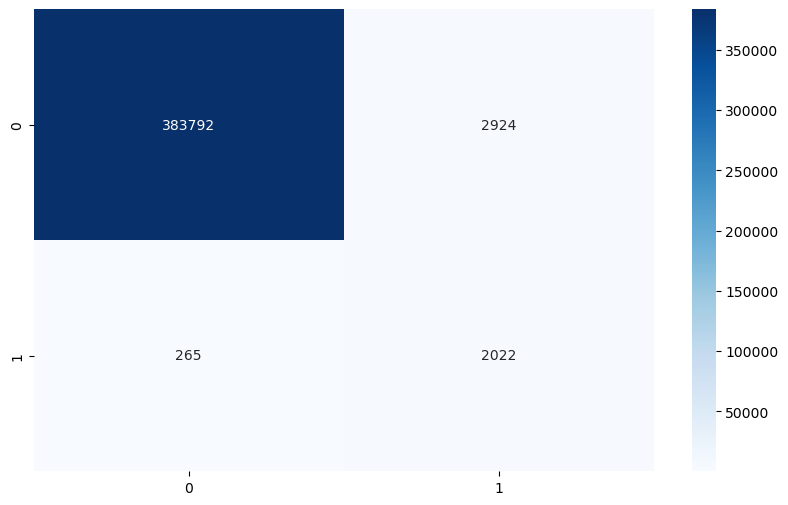

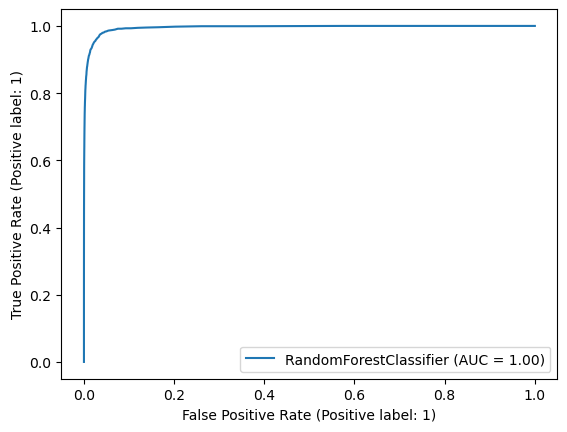

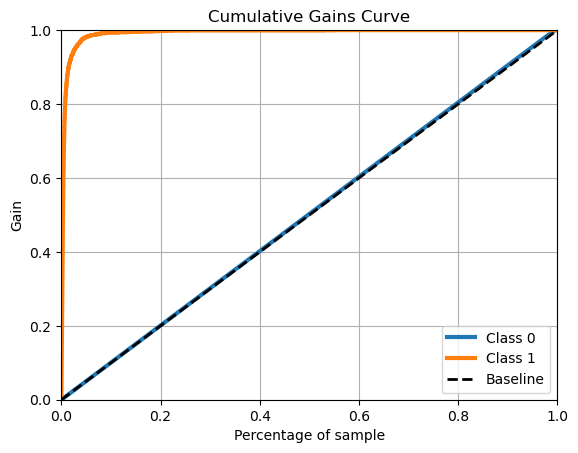

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    386716
           1       0.22      0.87      0.35      2287

    accuracy                           0.98    389003
   macro avg       0.61      0.93      0.67    389003
weighted avg       0.99      0.98      0.99    389003
 

Sensitivity:  0.8718845649322257
Specificity:  0.9818911035488576


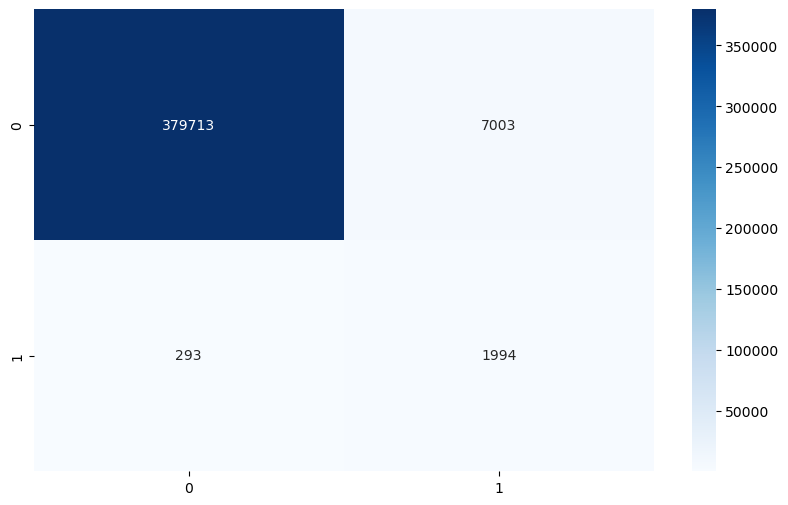

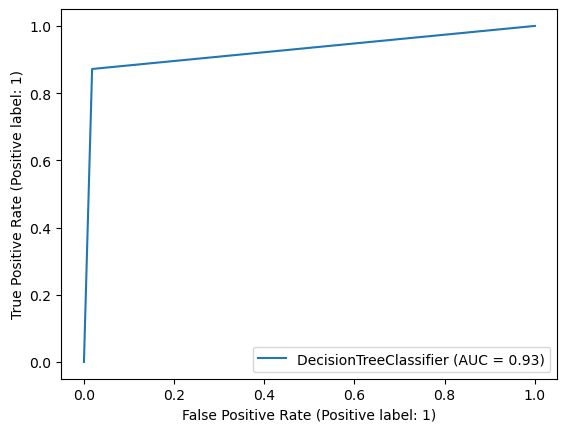

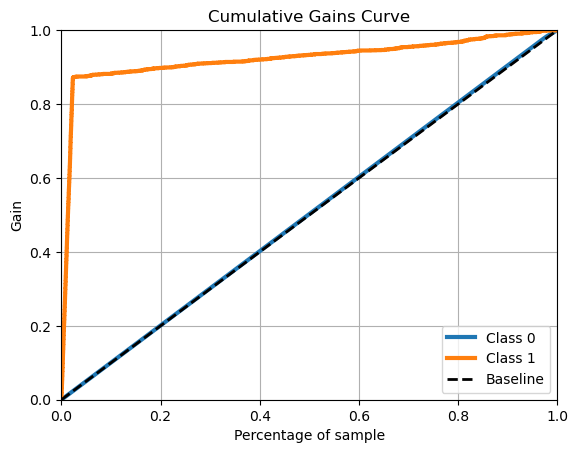

LogisticRegression


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       1.00      0.82      0.90    386716
           1       0.02      0.77      0.05      2287

    accuracy                           0.82    389003
   macro avg       0.51      0.80      0.47    389003
weighted avg       0.99      0.82      0.90    389003
 

Sensitivity:  0.7695671184958461
Specificity:  0.8218615211162714


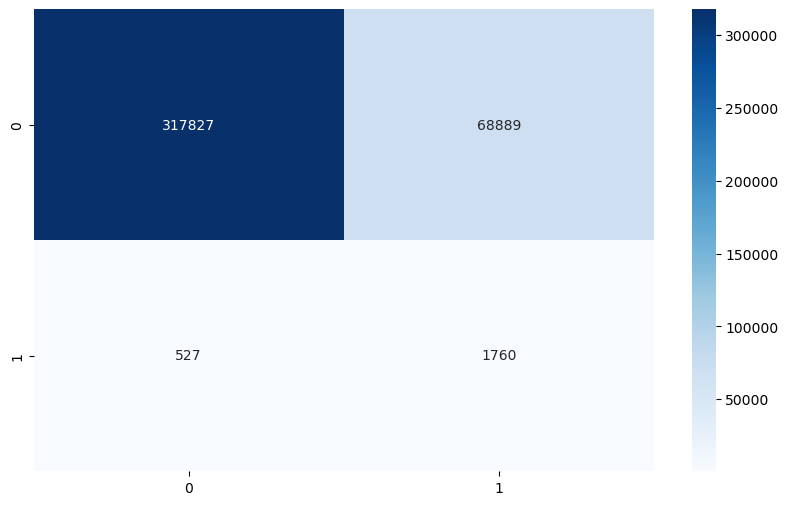

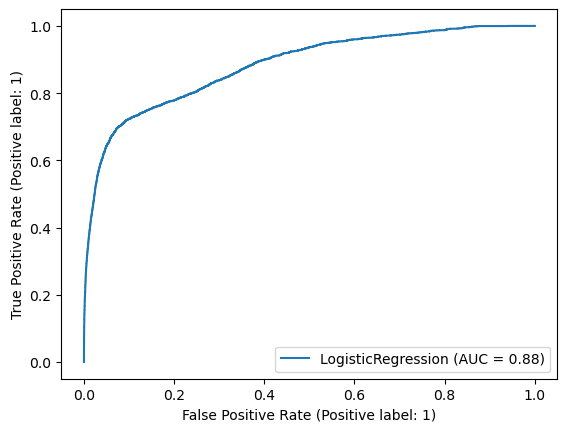

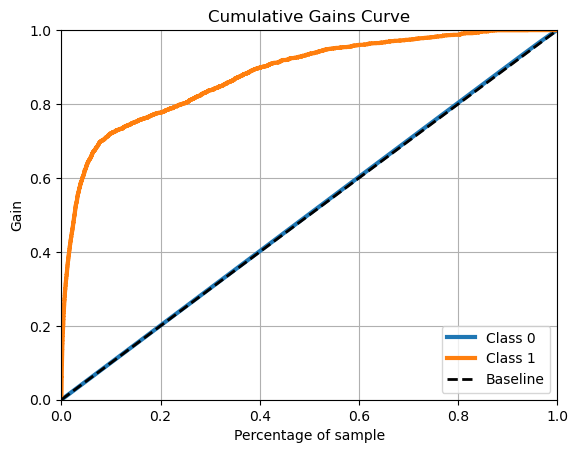

MultinomialNB
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    386716
           1       0.02      0.70      0.03      2287

    accuracy                           0.76    389003
   macro avg       0.51      0.73      0.45    389003
weighted avg       0.99      0.76      0.86    389003
 

Sensitivity:  0.6974202011368605
Specificity:  0.7564750359436899


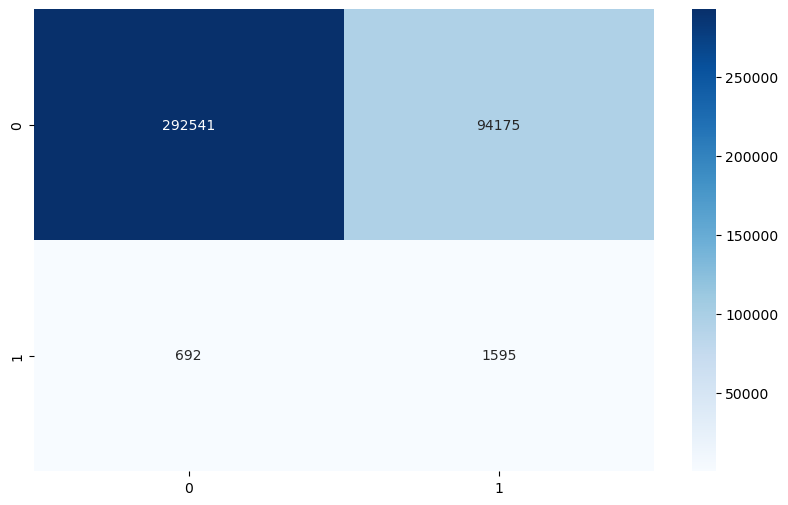

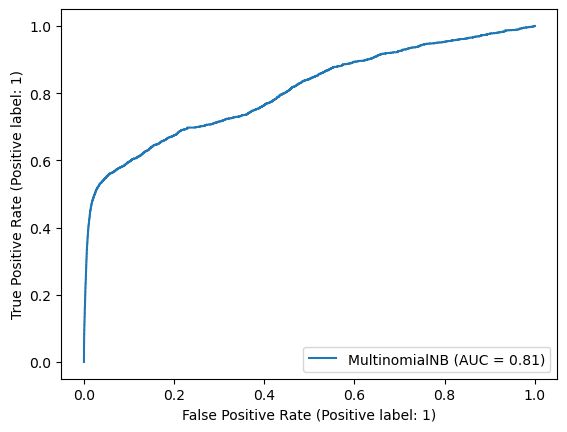

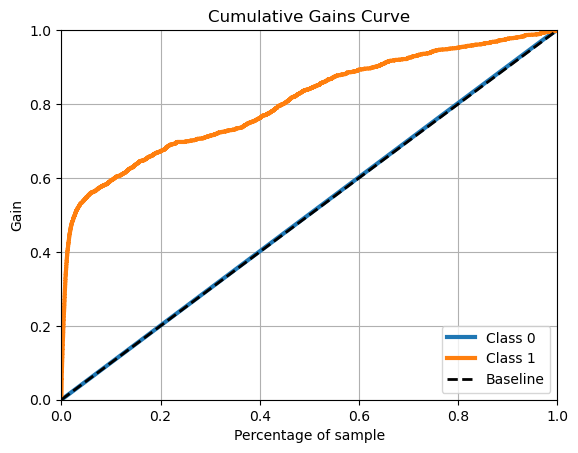

LinearDiscriminantAnalysis
              precision    recall  f1-score   support

           0       1.00      0.81      0.90    386716
           1       0.02      0.77      0.05      2287

    accuracy                           0.81    389003
   macro avg       0.51      0.79      0.47    389003
weighted avg       0.99      0.81      0.89    389003
 

Sensitivity:  0.7656318320944469
Specificity:  0.8134238045490748


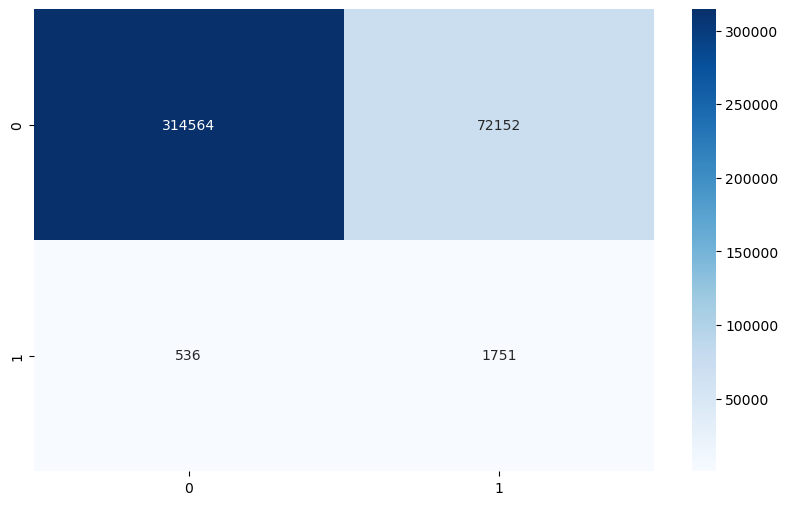

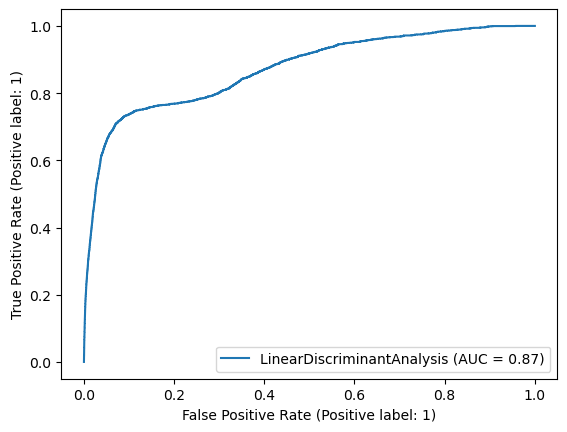

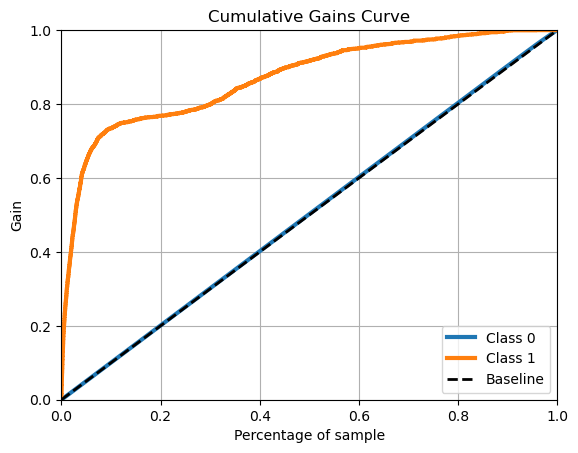

MLPClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    386716
           1       0.22      0.91      0.36      2287

    accuracy                           0.98    389003
   macro avg       0.61      0.95      0.68    389003
weighted avg       0.99      0.98      0.99    389003
 

Sensitivity:  0.9142982072584172
Specificity:  0.9813351399993794


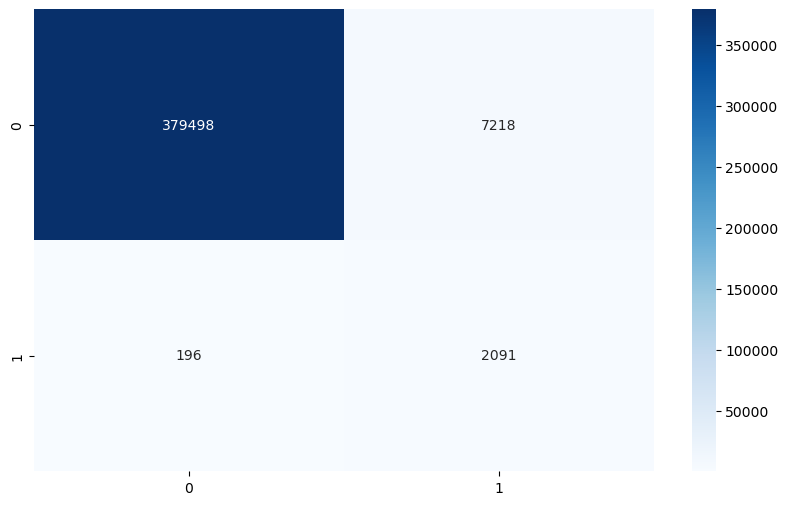

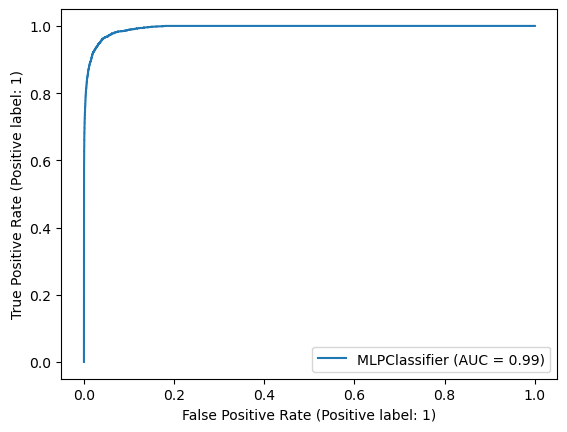

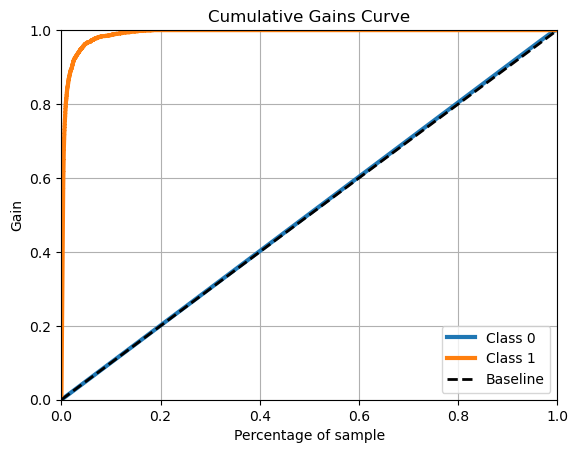

SVC


In [ ]:
algorithms = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), MultinomialNB(), discriminant_analysis.LinearDiscriminantAnalysis(),  MLPClassifier(), SVC(), KNeighborsClassifier()]

algo = []
for algorithm in algorithms:
    print(type(algorithm).__name__)

    f_score, MCC, AUC = confusion(X_tuning, y_tuning, X_valid, y_valid,model= algorithm)
    algo.append([type(algorithm).__name__, f_score, MCC, AUC])
print(algo)